In [2]:
import torch

In [3]:
a = torch.ones(2)
a

tensor([1., 1.])

In [7]:
a[1]

tensor(1.)

In [8]:
float(a[1])

1.0

In [15]:
points = torch.tensor([[1.0,4.0],[ 2.0,1.0],[ 3.0,5.0]])

In [16]:
points

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])

In [18]:
# 用shape询问张量形状
# 会告知您张量沿每个维度的大小
points.shape

torch.Size([3, 2])

In [27]:
# 可以使用zeros函数或ones函数来初始化张量，并且以元组形式指定张量的大小：
points = torch.zeros(3,2)
points

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

In [25]:
# 通过索引访问张量中的单个元素
points[2,1]

tensor(0.)

In [28]:
# 访问列
points[2]

tensor([0., 0.])

In [31]:
# 用storage 查看底层存储
# 存储器的布局始终是一维的，而与可能引用它的任何张量的维数无关。
points.storage()

 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
[torch.FloatStorage of size 6]

In [35]:
# 手动索引到存储
points_storage = points.storage()
points_storage[5] # points.storage()[5]

0.0

In [7]:
points = torch.tensor([[1.0,4.0], [2.0, 1.0], [3.0, 5.0]])
second_point = points[1]

# 相对于第一个数字的偏移量
second_point.storage_offset()

2

In [8]:
# size是包含一个元素的Size类的实例，因为张量是一维的
second_point.size()

torch.Size([2])

In [9]:
#  重要说明：此信息与张量对象的shape属性中包含的信息相同：
second_point.shape

torch.Size([2])

In [10]:
# 步长是一个元组，指示当索引在每个维度上增加1时，必须跳过的存储中元素的数量
points.stride()

(2, 1)

In [11]:
# 在2D张量中访问元素i、j导致访问存储器中的位置storage_offset + stride [0] * i + stride [1] * j元素

In [13]:
# 最重要的是，子张量减少了一个维度（如您所愿），同时仍然索引到与原始点张量相同的存储。
second_point.stride()

(1,)

In [14]:
# 更改子张量也会对原始张量产生影响：
#  这种效果可能并不总是我们想要的，因此您同样也可以将子张量克隆到新的张量中：

points = torch.tensor([[1.0,4.0], [2.0, 1.0], [3.0, 5.0]])
second_point = points[1].clone()
second_point[0] = 10.0
points # 没受到影响

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])

In [5]:
# 转置
points = torch.tensor([[1.0,4.0], [2.0, 1.0], [3.0, 5.0]])
# 转置后，行列互换
points_t = points.t()
points_t

tensor([[1., 2., 3.],
        [4., 1., 5.]])

In [6]:
# 验证两个张量共享存储
id(points.storage()) == id(points_t.storage())

True

In [7]:
# 并且他们在形状和步长上有所不同
points.stride()

(2, 1)

In [22]:
points_t.stride()
# 在这种情况下，points是连续的，但其转置不是：
points.is_contiguous() # true
points_t.is_contiguous() # false

False

In [23]:
# 您可以通过指定应沿其发生转置（例如翻转形状和步长）的两个维度来转置多维数组
some_tensor = torch.ones(3,4,5)
some_tensor_t = some_tensor.transpose(0,2)
some_tensor.shape #torch.Size([3, 4, 5])
some_tensor_t.shape #torch.Size([5, 4, 3])
some_tensor.stride() # (20,5,1)
some_tensor_t.stride() #(1,5,20)
# 在这种情况下，points是连续的，但其转置不是：
 

(1, 5, 20)

In [46]:
# 您可以使用contiguous方法从非连续张量中获得新的连续张量。张量的内容保持不变，但步长发生变化，存储也是如此：
points = torch.tensor([[1,4],[2,1],[3,5]])
points_t = points.t()
points_t
# tensor([[1, 2, 3],
 #       [4, 1, 5]])

points_t.storage()
#  1
#  4
#  2
#  1
#  3
#  5
# [torch.LongStorage of size 6]

points_t.stride()
# (1, 2)

points_t_cont = points_t.contiguous()
points_t_cont

# tensor([[1, 2, 3],
#         [4, 1, 5]])
points_t_cont.stride()
# (3, 1)

points_t_cont.storage()
#  1
#  2
#  3
#  4
#  1
#  5
# [torch.LongStorage of size 6]

# 已对存储进行了重新安排，以便在新存储中逐行布置元素。步长已更改以反映新的布局。

 1
 2
 3
 4
 1
 5
[torch.LongStorage of size 6]

# 2.4 数值类型

In [33]:
#  要分配正确的数值类型的张量，可以为构造器的参数指定适当的dtype
double_points = torch.ones(10,2,dtype=torch.double)
short_points = torch.tensor([[1,2],[3,4]], dtype = torch.short)

In [34]:
# 通过访问相应的属性来查找张量的dtype：
short_points.dtype

torch.int16

In [36]:
# 使用相应的转换方法将张量创建函数的输出转换为正确的类型
double_points = torch.zeros(10,2).double()
short_points = torch.ones(10,2).short()
# 或者更简便的方法
double_points = torch.zeros(10,2).to(torch.double)
short_points = torch.ones(10,2).to(dtype = torch.short)

In [38]:
# 在底层，type和to函数执行相同的类型的操作，即检查若有需要并转换操作，但是to方法可以接收其他参数。

points = torch.randn(10,2)
# 您始终可以使用type方法将一种类型的张量转换为另一种类型的张量：
short_points = points.type(torch.short)
short_points

tensor([[ 1,  0],
        [ 0,  0],
        [ 1,  0],
        [-1,  1],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 1,  0],
        [-2,  0]], dtype=torch.int16)

# 2.5 索引张量

In [52]:
# 方法和索引list对象一致
points
points[1:]
points[1:,:]
points[1:,0]

tensor([2, 3])

#  2.6 NumPy的互操作性

In [57]:
# NumPy数组的这种零拷贝互操作性是由于存储系统可与Python缓冲区协议 一起工作。

points = torch.ones(3,4)
points_np = points.numpy()
points_np
# 它返回大小、形状和数值类型正确的NumPy多维数组。
# 返回的数组与张量的存储共享一个底层缓冲区。

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

### 这将导致，只要数据位于CPU 的RAM中，numpy方法就可以基本不花费任何代价地有效执行，并且修改NumPy数组会导致原始张量发生变化。
### 如果张量分配在GPU上，PyTorch会将张量的内容复制到在CPU上分配的NumPy数组中。

In [59]:
# 从NumPy数组获得PyTorch张量
# 这个过程也使用相同的缓冲区共享策略。
points = torch.from_numpy(points_np)
points

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

# 2.7序列化张量 

In [61]:
# 将张量存入文件中实现静态，而不是每次偶读动态创建张量
# PyTorch在内部中使用的pickle来序列化tensor张量对象，以及用于存储的专用序列化代码。



In [67]:
## 写出：
torch.save(points,"C:/Users/admin/Desktop/面向蜂群协同的多智能体强化学习研究/MADRL_code/ourpoints.t")
# 可以传递文件描述符来代替文件名：
with open("C:/Users/admin/Desktop/面向蜂群协同的多智能体强化学习研究/MADRL_code/ourpoints.t",'wb') as f:
    torch.save(points,f)

ValueError: I/O operation on closed file.

In [71]:
## 读入：
# 将您的points用一行代码就能载入
points = torch.load("C:/Users/admin/Desktop/面向蜂群协同的多智能体强化学习研究/MADRL_code/ourpoints.t")
# same 
with open("C:/Users/admin/Desktop/面向蜂群协同的多智能体强化学习研究/MADRL_code/ourpoints.t",'rb') as f:
    points = torch.load(f)
points

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [72]:
# 这种文件是一种二进制文件格式，除了pytorch，其他软件无法使用，即不具有互操作性

SyntaxError: invalid syntax (<ipython-input-72-3e943853677c>, line 1)

In [74]:
# 可以使用HDF5格式，来解决上面的问题
# HDF5是一种可移植的，广泛支持的格式，用于表示以嵌套键值字典形式组织的序列化多维数组

# 在这里，’coords’是HDF5文件的关键字。
# 您可以有其他关键字，甚至是嵌套键。HDF5的一件有趣的事是，您可以在磁盘上对数据集编制索引，并仅访问您感兴趣的元素。
import h5py
f = h5py.File("C:/Users/admin/Desktop/面向蜂群协同的多智能体强化学习研究/MADRL_code/ourpoints.hdf5",'w')
dset = f.create_dataset('coords',data = points.numpy())
f.close()

In [81]:
# 假设您只想加载数据集中的最后两点：
f = h5py.File("C:/Users/admin/Desktop/面向蜂群协同的多智能体强化学习研究/MADRL_code/ourpoints.hdf5",'r')
dset = f['coords']
last_points = dset[1:]
last_points
#在这里，打开文件或需要数据集时并未加载数据。
# 事实上，数据一直保留在磁盘上，直到您请求数据集中的第二行和最后一行。
# 这时，h5py访问了这两列，并返回了一个类似NumPy数组的对象，
# 该对象封装了该数据集中该区域，
# 该区域的行为类似于NumPy数组并且具有相同的API。

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

In [82]:
# 由于这个事实，您可以将返回的对象传递给torch.from_numpy函数以直接获取张量。 请注意，在这种情况下，数据将复制到张量的存储中：
last_points = torch.from_numpy(dset[1:])
f.close()
last_points

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

# 2.8将张量移动到GPU 

In [83]:
# 每个Torch张量都可以转移到GPU，以执行快速、大规模的并行计算。在张量上执行的所有操作均由PyTorch上的GPU特定例程执行。

In [84]:
# PyTorch张量还具有设备的概念，这是在计算机上用于放置张量数据的位置。

In [88]:
# 在GPU上创建张量的方法：
points_gpu = torch.tensor([[1,4], [2,1], [3,4]],device = 'cuda')
points_gpu

AssertionError: Torch not compiled with CUDA enabled

In [90]:
# 改为使用to方法将在CPU上创建的张量复制到GPU中去：
points_gpu =  points.to(device = 'cuda')

# 此代码返回一个具有相同数值数据的新张量，但将其存储在GPU的RAM中，而不是常规的系统RAM中。
# 此新的GPU支持的张量的类也更改为torch.cuda.FloatTensor,以此类推

AssertionError: Torch not compiled with CUDA enabled

In [91]:
# 如果您的机器具有多个GPU，则可以通过传递标识机器上GPU的从零开始的整数来决定将张量分配给哪个GPU：

points_gpu = points.to(device = 'cuda:0')
# 对张量执行的任何操作（例如将所有元素乘以一个常数）都在GPU上执行


AssertionError: Torch not compiled with CUDA enabled

## 请注意，计算结果后，points_gpu张量不会被带回CPU。 以下是整个发生的过程：
### 1	points张量复制到GPU。
### 2	在GPU上分配了一个新的张量，用于存储乘法结果。
### 3	返回该GPU张量的句柄。

In [92]:
# 要将张量移回CPU，需要为to方法提供一个cpu参数：
# (使用to方法时，可以通过提供device和dtype作为参数来同时更改位置和数据类型。)
points_cpu = points_gpu.to(device = 'cpu')

In [93]:
# 您可以使用简写的cpu方法和cuda方法代替to方法来实现相同的目标：
points_gpu = points.cuda()
points_gpu - points.cuda(0)
points_cpu = points_gpu.cpu()

AssertionError: Torch not compiled with CUDA enabled

# 2.9 张量的API 

In [101]:
# 在张量上和张量之间的绝大多数操作都可以在torch模块下获得，
# 也可以通过tensor对象来调用这些方法

a = torch.ones(3,2)
a_t = torch.transpose(a,0,1)
# same
a_t = a.transpose(0,1)
# note: 少量的操作仅作为张量tensor对象的方法而存在
# 可以通过名称中的下划线来识别它们,这表示该方法通过原地修改输入并返回它而不是创建新的输出张量
# 任何不带下划线的方法都将使源张量保持不变并返回新的张量：
a = torch.ones(3,2)

a.zero_()

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

#### ·创建操作-构造张量的函数，例如，ones函数和from_numpy函数
#### ·索引、切片、连接和变异操作-更改张量的形状、步幅或内容的函数，例如转置transpose	函数
#### ·数学操作-通过计算来操作张量内容的函数：
#### –点向运算-通过将函数独立地应用于每个元素来获得新张量的函数，例如abs和cos函	 数
#### –化简运算-通过迭代张量来计算合计值的函数，例如mean、std、norm函数
#### –比较运算–用于张量上的数值谓词求值的函数，例如equal和max函数
#### –频谱运算–用于在频域中转换并在频域中操作的函数，例如stft和hamming_window函	 数 
#### –其他运算–在向量上操作的特殊函数，例如cross函数或在矩阵上的trace函数
#### – BLAS和LAPACK操作-遵循BLAS（基本线性代数子程序）规范的函数，用于标量、向量-矢量、矩阵-矢量和矩阵-矩阵运算
#### ·随机采样操作-通过从概率分布中随机抽取值来生成值的函数（例如randn和normal）
#### ·序列化操作-用于保存和加载张量的函数（例如load和save函数）
#### ·并行操作-用于控制并行CPU执行的线程数的函数，例如set_num_threads函数
#### 使用常规张量API很有用。本章应提供进行这种交互式探索的所有先决条件。

In [124]:
a = torch.tensor(list(range(9)))
b = a.view(3,3)
c = b[1:,1:]


 0
 1
 2
 3
 4
 5
 6
 7
 8
[torch.LongStorage of size 9]

In [ ]:
# 总结
# ·神经网络将浮点表示形式转换为其他浮点表示形式，起始和结束的表示形式通常是人类可以解释的。中间的表示则不具备可解释性。
# ·这些浮点表示存储在张量中。
# ·张量是多维数组，也是PyTorch中的基本数据结构。
# · PyTorch具有用于张量创建和操作以及数学运算的综合标准库。
# ·张量可以序列化到磁盘并重新加载回来。
# · PyTorch中的所有张量操作都可以在CPU和GPU上执行，而无需更改代码。
# · PyTorch使用结尾的下划线表示函数在张量上原地运行（例如Tensor.sqrt_函数）。

# 3.1表格式数据

In [127]:
# 神经网络是将实数作为输入并通过连续应用矩阵乘法和非线性函数产生实数作为输出的数学实体。

In [ ]:
# 葡萄酒数据
# 前11列包含化学变量的值；最后一列包含从0（最差）到10（优秀）的感官质量得分。

In [133]:
# 三种流行的用于快速加载CSV文件的选项。是：
# ·Python随附的csv模块
# ·NumPy
# ·Pandas

import csv
import numpy as np
wine_path = "./winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows = 1)

In [134]:
 winequality-white

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [137]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))

wineq_numpy.shape,col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [140]:
wineq = torch.from_numpy(wineq_numpy)
wineq.shape, wineq.type()

(torch.Size([4898, 12]), 'torch.FloatTensor')

### 间隔、序数和分类值

In [142]:
data = wineq[:,:-1]
data,data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [144]:
target = wineq[:,-1]
target,target.shape

(tensor([6., 6., 6.,  ..., 6., 7., 6.]), torch.Size([4898]))

### 如果要在标签的张量中转换目标张量target，则有两个选择，具体取决于策略或要使用分类数据的方式。

##### 一种选择是将标签视为分数的整数向量：

In [148]:
# 适合有排序情况
target = wineq[:,-1].long()
target,target.shape[0]

(tensor([6, 6, 6,  ..., 6, 7, 6]), 4898)

##### 构建分数的独热编码

In [158]:
# 适合无排序情况
# 可以通过使用scatter_方法来实现独热编码，
# 该方法将源张量中的值沿着作为参数提供的索引来填充张量。
# scatter_的参数如下：
# ·指定以下两个参数的维度
# ·列张量，指示要散布的元素的索引
# ·一个张量，包含要散布的元素或单个散布的标量（在这种情况下为1）
target_onehot = torch.zeros(target.shape[0],10)
target_onehot.scatter_(1 ,target.unsqueeze(1),1.0)
# 上面的调用可以这样理解：“对于每一行，获取目标标签的索引（在这种情况下，该索引与得分分数一致），并将其用作列索引以设置值1.0。
# 得到的结果是编码分类信息的张量。”

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [162]:
target.unsqueeze(1),target.unsqueeze(1).shape

(tensor([[6],
         [6],
         [6],
         ...,
         [6],
         [7],
         [6]]),
 torch.Size([4898, 1]))

In [ ]:
#  scatter_函数的第二个参数，即索引张量，必须具有与分散后的张量相同的维数数量。
# 由于target_onehot具有两个维度（4898x10），因此您需要使用unsqueeze函数为目标target添加一个额外的空维度：
# unsqueeze函数的调用增加了一个单独维度，从4898个元素的1D张量到大小为（4898x1）的2D张量，而不更改其内容。
# 没有添加元素；
# 您决定使用额外的索引来访问元素。
# 也就是说，您对于target的第一个元素使用target [0]来访问，并使用target_unsqueezed [0,0]来索引unsqueezed处理后的对应对象的第一个元素。

In [ ]:
# 如果您想将分数用作网络的分类输入，则必须将其转换为独热编码的张量。

In [167]:
#  现在回到数据data张量，其中包含与化学分析相关的11个变量。
# 首先，获取每列的均值和标准差：
data_mean = torch.mean(data,dim = 0)
data_var = torch.var(data,dim=0)
data_mean,data_var

(tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
         1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01]),
 tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
         1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00]))

In [170]:
# 可以通过减去平均值并除以标准偏差来对数据进行归一化，这有助于学习过程。
data_normalized = (data - data_mean ) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7996e-02,  ...,  7.3995e-01,
          1.3422e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]])

In [177]:
# 寻找一种简单的方法来一眼分辨好酒和坏酒。

#首先，使用torch.le函数确定目标target中哪些行对应的分数小于或等于3：

bad_indexes = torch.le(target,3)
target,bad_indexes.shape,bad_indexes.dtype,bad_indexes.sum() 

(tensor([6, 6, 6,  ..., 6, 7, 6]), torch.Size([4898]), torch.bool, tensor(20))

In [184]:
# 通过利用PyTorch中称为advanced indexing高级索引的功能，可以使用二进制张量来索引数据张量data。
bad_data = data[bad_indexes]
bad_data.shape


torch.Size([4898, 11])

In [187]:
# 开始获取有关葡萄酒的信息，这些葡萄酒分为好、中和坏三类。对每一列取.mean()函数：
bad_data = data[torch.le(target,3)]
mid_data = data[torch.gt(target,3) & torch.lt(target,7)]
good_data = data[torch.ge(target,7)]

bad_mean = torch.mean(bad_data, dim = 0)
mid_mean = torch.mean(mid_data, dim = 0)
good_mean = torch.mean(good_data, dim = 0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [191]:
# 乍看之下，相比其他差异，劣质葡萄酒似乎具有较高的总二氧化硫含量
# 可以使用二氧化硫总量的阈值来作为区分好酒和差酒的粗略评判标准。
# 现在获取总二氧化硫列上的值低于您之前计算的中点的索引
total_sulfur_threshold = 141.83
total_sulfur_data = data[:,6]
total_sulfur_data
predicted_indexes = torch.le(total_sulfur_data, total_sulfur_threshold)
predicted_indexes.shape,predicted_indexes.dtype,predicted_indexes.sum()
# 您的阈值意味着，一半以上的葡萄酒将是高品质的。

(torch.Size([4898]), torch.bool, tensor(2727))

In [192]:
# 接下来， 获取优质葡萄酒的索引：
actual_indexes = torch.gt(target,5)
actual_indexes.shape,actual_indexes.dtype,actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [196]:
# 由于您拥有的优质葡萄酒比您阈值预计的多约500种，因此您已经有确凿的证据证明该阈值并不完美。

# 您需要查看您的预测与实际排名的匹配程度。
# 在预测索引和良好索引之间执行逻辑and运算（请记住，每个索引是0和1组成的数组）
# 并使用葡萄酒的交叉一致程度来确定您的表现如何：

n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()

n_matches, n_matches / n_predicted, n_matches / n_actual

(2018, 0.74000733406674, 0.6193984039287906)

In [197]:
# 因为您预测有2700种葡萄酒，所以如果您预测葡萄酒是高质量的，那么有74％的可能性预测正确。
# 不幸的是，您有3200种优质葡萄酒，仅能识别出61％。 

In [198]:
# 您可以肯定地知道，多个变量会影响葡萄酒的质量，这些变量的值与结果之间的关系（可能是实际分数，而不是二值化版本）可能比简单的阈值更为复杂，而不仅仅是单个值。
# 实际上，简单的神经网络将克服所有这些限制，就像许多其他基本的机器学习方法一样。 

# 3.2时间序列

In [199]:
# # 在源数据中，每行是一个单独的小时数据（图3.2显示了该数据的转置版本以更好地适合打印页面）
# #我们要更改为行每小时的组织，以便使:
# 一个轴以每个索引增量一天的速度增加，而
# 另一个轴则表示一天中的小时（与日期无关）。
# 第三个轴是不同的数据列（天气、温度等）。

In [206]:
bike_numpy = np.loadtxt("./hour-fixed.csv",
                       dtype = np.float32,
                       delimiter=",",
                       skiprows = 1,
                       converters = {1: lambda x: float(x[8:10])})

bikes = torch.from_numpy(bike_numpy)
bikes

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.0000e+00, 1.3000e+01,
         1.6000e+01],
        [2.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 8.0000e+00, 3.2000e+01,
         4.0000e+01],
        [3.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 5.0000e+00, 2.7000e+01,
         3.2000e+01],
        ...,
        [1.7377e+04, 3.1000e+01, 1.0000e+00,  ..., 7.0000e+00, 8.3000e+01,
         9.0000e+01],
        [1.7378e+04, 3.1000e+01, 1.0000e+00,  ..., 1.3000e+01, 4.8000e+01,
         6.1000e+01],
        [1.7379e+04, 3.1000e+01, 1.0000e+00,  ..., 1.2000e+01, 3.7000e+01,
         4.9000e+01]])

# 
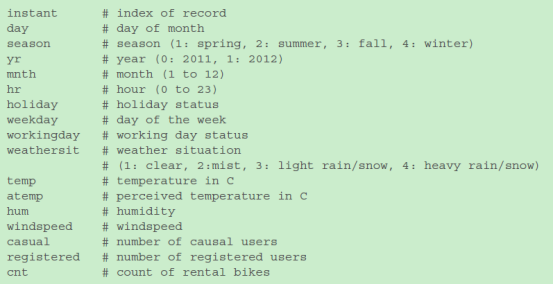

In [207]:
# 对于每小时，数据及报告以上变量
# 在这样的时间序列数据集中，行表示连续的时间点：按其排序的维度。
# 这种排序的存在使您有机会利用跨时间的因果关系。

In [209]:
# 该神经网络模型需要查看每个数量的值序列，
# 例如乘车次数、一天中的时间、温度和天气情况，
# 因此是N个并行的大小为C的序列。
# C代表通道channel，
# 在神经网络术语中，它是与此处所示的一维数据列相同。
# N维度代表时间轴，这里是每小时一个条目。

In [211]:
# 您可能希望在更宽的观察期内（例如天）分解2年数据集。这样，您将拥有N个（样本数）长度为L的C序列的集合。换句话说，您的时间序列数据集是有3个维度的张量，形状为N×C×L。C仍然是 17个通道，而L则是24个通道对应一天中每个小时。没有必要特别说明为什么我们必须使用24小时的时间段，尽管一般的日常节奏可能会给我们提供可用于预测的模式。如果需要，我们可以改为使用7 * 24 = 168小时的块按周划分。

In [220]:
bikes[:,1]

tensor([ 1.,  1.,  1.,  ..., 31., 31., 31.])

In [221]:
# 您的数据集已经排序，但是如果没有排序，则可以在其上使用torch.sort进行适当排序。

In [222]:
# 要获取每日工作时间数据集，您要做的就是每24小时查看同一张量。

In [226]:
#  看一下您的自行车张量bikes的形状和步长：
bikes.shape,bikes.stride()

(torch.Size([17520, 17]), (17, 1))

In [231]:
# 现在，将数据重构为具有三个轴（天、小时，然后是17列）：
daily_bikes = bikes.view(-1,24,bikes.shape[1])
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [229]:
# 这里发生了什么？
# 首先，bikes.shape [1]是17，它是bikes张量中的列数。
# 但是代码的真正关键之处在于调用视图view，这很重要：它改变了张量查看在相同存储中的数据的方式。
# 在张量上调用view将返回一个新的张量，该张量将更改维数和步长信息，而不会更改存储storage。
# 从而，您可以以零成本重新布置张量，因为根本没有数据被复制。
# 您的view调用要求您为返回的张量提供新的形状。将-1用作占位符，表示“给定其他维度和元素的原始数量，剩下多少。


In [232]:
# 对于daily_bikes，步长告诉您，沿小时维度（第二个维度）前进1个位置需要您在存储中的位置前进17个位置（或一组列），而沿白天维度（第一个）前进需要您进行以下操作： 在存储中前进的元素数等于行的长度的乘以24（此处为408，即17 * 24）。
# 在中间维度中，您将时间分为24个连续小时的块。

In [233]:
#  换句话说，您现在每天有C个通道的N个L小时的序列。为了获得所需的N×C×L顺序，您需要转置张量：
daily_bikes = daily_bikes.transpose(1,2)
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

In [244]:
# 前面我们提到天气条件变量是序数。
# 实际上，它有4个级别：1表示最佳天气，4表示最坏天气。
# 您可以将此变量视为分类变量，将级别解释为标签或连续变量。
# 如果选择分类变量，则将变量转换为独热编码的向量，并将列与数据集连接起来。

# 为了使数据渲染更容易，现在暂时限制为第一天。
# 首先，初始化一个零填充矩阵，其行数等于一天中的小时数，列数等于天气水平的数：

first_day = bikes[:24].long()
first_day[:,9] 

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2])

In [250]:
# 然后根据每一行的对应级别将它们分散到我们的矩阵中。
# 请记住，之前曾使用unsqueeze来添加单个维度：

weather_onehot = torch.zeros(first_day.shape[0], 4)
weather_onehot.scatter_(
    dim = 1,
    index = first_day[:,9].unsqueeze(1) - 1,  # -1 因为weather分级是从1 ~4，而索引是从0~3
    value = 1.0)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [254]:
#   最后，使用cat函数将矩阵连接到原始数据集。
# 查看您的第一个结果：

torch.cat((bikes[:24], weather_onehot), 1)[:1]

tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
          0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
         16.0000,  1.0000,  0.0000,  0.0000,  0.0000]])

In [ ]:
#  在这里，您规定了原始bikes数据集和独热编码的天气状况矩阵将沿着列维（例如1）连接在一起。换句话说，将两个数据集的列堆叠在一起，或者将新的独热编码列添加到原始数据集。为了使cat函数成功调用，张量在其他尺寸（在这种情况下为行尺寸）上必须具有相同的大小。

In [259]:
#  您可以使用经过重塑的daily_bikes张量完成相同的操作。请记住，它的形状是（B，C，L），其中L =24
# 首先，创建零张量，其B和L相同，但附加列数C： 

daily_weather_onehot = torch.zeros(daily_bikes.shape[0],4,daily_bikes.shape[2])
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [262]:
# 然后将独热编码散布到张量中的C维中
daily_weather_onehot.scatter_(1, daily_bikes[:,9,:].long().unsqueeze(1) - 1, 1.0)
daily_weather_onehot.shape


torch.Size([730, 4, 24])

In [263]:
# 沿C维连接：
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim =1)

In [264]:
# 实际上，其标签具有序数关系，因此您可以假装它们是连续变量的特殊值。您可以转换变量，使其从0.0到1.0运行：
daily_bikes[:,9,:] = (daily_bikes[:,9,:] - 1.0) / 3

In [266]:
# 您有多种重新缩放变量的可能性。

# 您可以将其范围映射到[0.0，1.0]
temp = daily_bikes[:,10,:]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
daily_bikes[:,10,:] = (daily_bikes[:,10,:] - temp_min) / (temp_max - temp_min)

# 或减去平均值并除以标准偏差：
temp = daily_bikes[:,10,:]
daily_bikes[:,10,:] = (daily_bikes[:,10,:] - torch,mean(temp)) / torch.std(temp)

NameError: name 'daily' is not defined

In [ ]:
# 仅了解一个时间序列的布局以及如何将数据整理成网络可消化的形式这一点很重要。

# 3.3文本

In [267]:
# 您的目标是将文本转换为神经网络可以处理的内容
# 如果以正确的形式描述问题，则可以使用相同的PyTorch工具在不同域中的任务上实现最新性能。
# 这项工作的第一部分是重构数据。

In [271]:
with open("./1342-0.txt", encoding = 'utf-8') as f:
    text = f.read()


In [272]:
# 解析文本中的字符，并为每个字符提供独热编码
#每个字符将由一个长度等于编码中字符数的向量表示

# 首先，将您的文本text分成几行，然后关注于任意选择的一行：
lines = text.split('\n')
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [280]:
# 创建一个张量，该张量可以包含整行字符总数的独热编码：

letter_tensor = torch.zeros(len(line), 128)
letter_tensor.shape

for i,letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_tensor[i][letter_index] = 1


In [295]:
# 定义clean_words函数，它接受文本并将其返回其小写字母形式并去除标点符号。
def clean_words(input_str):
    punctuation = '.,;；:"!?"“`_- '
    word_list = input_str.lower().replace('\n',' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
line,words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [297]:
# 接下来，在编码中建立单词到索引的映射：

word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i,word) in enumerate(word_list)}
len(word2index_dict),word2index_dict['impossible']

(8267, 3848)

In [301]:
# 将其分解为单词并对其进行独热编码

#  创建一个空向量，并为句子中的单词分配一个独热编码值：

word_tensor = torch.zeros(len(words_in_line), len(word2index_dict))
for i,word in enumerate(words_in_line):
    
    word_index = word2index_dict[word]
    word_tensor[i][word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))

word_tensor.shape

 0 3848 impossible
 1 4928 mr
 2  899 bennet
 3 3848 impossible
 4 8049 when
 5 3759 i
 6  449 am
 7 5081 not
 8  249 acquainted
 9 8126 with
10 3637 him


torch.Size([11, 8267])

In [302]:
# 这种独热编码方式对于文本标记，太重了，怎样缩小呢？
# 可以做一些工作来对单词进行重复数据删除、压缩替代拼写、将过去和将来时态合并为单个标记，等等

# 可以使用浮点数向量，而不是使用多个零和一个1的向量。
# 举例来说，一个100个浮点数的向量确实可以表示大量的单词。
# 诀窍是找到一种有效的方法，以一种有助于下游学习的方式将单个单词映射到此100维空间。
# 此技术称为嵌入。
# 嵌入通常是通过使用神经网络生成的，试图从邻近词（上下文）中预测一个词。
# 如果要为“ apple”使用嵌入向量，并开始为其他词向量做加法和做减法，则可以开始进行类比，例如apple-red-sweet+yellow+sour，最后得到一个类似于一个代表“柠檬”向量。？


# 3.4图像

In [304]:
# 首先使用imageio模块加载PNG图像。

In [307]:
import imageio

img_arr = imageio.imread("./bobby.jpg")
img_arr.shape # 显然这是个 width * height * rdb

(720, 1280, 3)

In [321]:
# 注意： 处理图像数据的PyTorch模块要求将张量布置为C×H×W（分别为通道、高度和宽度）。
# 使用转置函数即可,交换第0个和第2个维度

img = torch.from_numpy(img_arr)
out = torch.transpose(img,0,2)
# out使用与img相同的底层存储，并在张量级别上使用大小和步长信息
# 即更改img会导致out的变化
 

tensor([[[ 77,  75,  74,  ..., 215, 215, 215],
         [ 77,  76,  75,  ..., 216, 216, 216],
         [ 78,  77,  77,  ..., 217, 217, 217],
         ...,
         [118, 118, 117,  ..., 174, 173, 159],
         [117, 117, 117,  ..., 176, 174, 158],
         [116, 116, 116,  ..., 176, 174, 158]],

        [[ 45,  43,  39,  ..., 165, 165, 165],
         [ 45,  44,  40,  ..., 166, 166, 166],
         [ 46,  45,  43,  ..., 167, 167, 167],
         ...,
         [ 78,  78,  80,  ..., 121, 123, 109],
         [ 77,  77,  78,  ..., 123, 124, 107],
         [ 76,  76,  77,  ..., 123, 124, 107]],

        [[ 22,  20,  17,  ...,  78,  78,  78],
         [ 22,  21,  18,  ...,  79,  79,  79],
         [ 21,  20,  18,  ...,  80,  80,  80],
         ...,
         [ 52,  52,  51,  ...,  51,  54,  40],
         [ 51,  51,  49,  ...,  53,  55,  41],
         [ 50,  50,  48,  ...,  53,  55,  41]]], dtype=torch.uint8)

In [323]:
# 作为使用堆栈构建张量的更有效的替代方法，您可以预分配适当大小的张量，并用从目录中加载的图像来填充它，

batch_size = 100
batch = torch.zeros(100,3,256,256, dtype = torch.uint8)

# 这表示您的批次将包含100个RGB图像，高度分别为256像素，高度为256像素

In [342]:
import os

data_dir = "./image-cats" 
filenames = ['./image-cats/' + name for name in os.listdir(data_dir)]

for i,filename in enumerate(filenames):
    img_arr = imageio.imread(filename)
    batch[i] = torch.transpose(torch.from_numpy(img_arr), 0, 2)

tensor([[[238, 238, 238,  ..., 214, 214, 214],
         [238, 238, 238,  ..., 213, 213, 213],
         [238, 238, 238,  ..., 212, 212, 212],
         ...,
         [214, 214, 214,  ..., 187, 186, 186],
         [215, 215, 215,  ..., 190, 190, 190],
         [215, 215, 215,  ..., 193, 192, 192]],

        [[195, 195, 195,  ..., 128, 128, 128],
         [195, 195, 195,  ..., 127, 127, 127],
         [195, 195, 195,  ..., 126, 126, 126],
         ...,
         [173, 173, 173,  ..., 100,  99,  99],
         [175, 175, 175,  ..., 103, 103, 103],
         [175, 175, 175,  ..., 106, 105, 105]],

        [[137, 137, 137,  ...,  79,  79,  79],
         [137, 137, 137,  ...,  78,  78,  78],
         [137, 137, 137,  ...,  77,  77,  77],
         ...,
         [125, 125, 125,  ...,  64,  64,  65],
         [126, 126, 126,  ...,  68,  69,  69],
         [126, 126, 126,  ...,  72,  71,  72]]], dtype=torch.uint8)

In [343]:
# 归一化
## 法1：
batch = batch.float()
batch /= 255.0

tensor([[[[0.6118, 0.6824, 0.4980,  ..., 0.4549, 0.5059, 0.5059],
          [0.5961, 0.5255, 0.6118,  ..., 0.5098, 0.5098, 0.4824],
          [0.4863, 0.6471, 0.4196,  ..., 0.5059, 0.4824, 0.4627],
          ...,
          [0.5882, 0.4706, 0.5137,  ..., 0.4980, 0.4510, 0.4431],
          [0.5843, 0.5333, 0.5608,  ..., 0.4627, 0.4745, 0.4745],
          [0.6196, 0.5412, 0.6431,  ..., 0.4392, 0.4471, 0.4706]],

         [[0.5451, 0.6275, 0.4431,  ..., 0.3882, 0.4353, 0.4353],
          [0.5294, 0.4667, 0.5490,  ..., 0.4314, 0.4353, 0.4078],
          [0.4275, 0.5843, 0.3529,  ..., 0.4353, 0.4157, 0.4000],
          ...,
          [0.5294, 0.4118, 0.4627,  ..., 0.4588, 0.4157, 0.4039],
          [0.5294, 0.4784, 0.5059,  ..., 0.4235, 0.4392, 0.4314],
          [0.5765, 0.4863, 0.5961,  ..., 0.4039, 0.4118, 0.4353]],

         [[0.5059, 0.6078, 0.4078,  ..., 0.3647, 0.4235, 0.4196],
          [0.4824, 0.4314, 0.5176,  ..., 0.4235, 0.4235, 0.3843],
          [0.3843, 0.5373, 0.3137,  ..., 0

# 3.5体积数据

In [345]:
#  通过将单个2D切片堆叠到3D张量中，您可以构建表示对象的3D解剖结构的体积数据。
# 例如，将脑切片转换成脑3D

In [346]:
# 使用imageio模块中的volread函数加载一个样本CT扫描

# 总结

In [349]:

# ·神经网络要求将数据表示为多维数值张量，通常为32位浮点数。
# ·由于PyTorch库与Python标准库和周围的生态系统进行交互方式，因此可以方便地加载最常见的数据类型并将其转换为PyTorch张量。
# ·通常，PyTorch期望根据模型架构（例如卷积与递归）按照特定的维度对数据进行布局。
#   使用PyTorch张量API可以有效地实现数据重塑。
# ·电子表格可以很容易地转换为张量。分类值和序数值列的处理方式应不同于间隔值列。
# ·通过使用字典，可以将文本或分类数据编码为独热编码表示。
# ·图像可以具有一个或多个通道。最常见的是典型数码照片的红色、绿色和蓝色通道。
# ·单通道数据格式有时会省略明确的通道维度。
# ·体积数据类似于2D图像数据，但增加了第三个维度：深度。
# ·许多图像的每个通道的位深度为8，尽管每通道12位和16位并不罕见。这些位深度可以存储为32位浮点数，而不损失精度。

# 4.1学习就是是参数估计

In [1]:
# example for 温度计
# 详见1_parameter_estimation.ipynb

In [5]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

In [6]:
# t_c是摄氏温度，t_u是未知单位
# 可以预料到设备本身和您的近似读数都会产生噪声。
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [7]:
# 4.1.2选择线性模型作为首次尝试
def model(t_u, w, b):
    return w * t_u + b

In [8]:
# 计算loss

#平方差也比绝对差更严重地惩罚了严重错误的结果。
# 平方差有助于按需要对这些结果进行优先级排序
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [9]:
# 初始化参数，调用模型，

w = torch.ones(1)
b = torch.zeros(1)

t_p = model(t_u, w, b)

# 检查损失值
loss = loss_fn(t_p, t_c)


# 4.1.5沿梯度下降

In [10]:
# 在w和b的当前值的很小范围内， w的单位增加会导致损耗的某些变化。 
# 如果变化为负，则需要增加w以使损失最小，
# 而如果变化为正，则需要减小w。
# 减多少？
# 对w施加与损失的变化率成比例的变化是个好主意，尤其是在损失具有多个参数的情况下：将变化应用于对损失有重大变化的参数。
# 这个比例因子有很多名称。机器学习中使用的名称是learning_rate。

delta = 0.1
learning_rate = 1e-2


loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)
w = w - learning_rate * loss_rate_of_change_w

In [11]:
# 可以使用b进行相同操作：

loss_rate_of_change_b = (loss_fn(model(t_u, w, b+ delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b


In [12]:
# 通过重复这些评估（假设您选择的学习率足够低），您可以收敛到参数的最佳值，对于该参数，根据给定数据计算出的损失最小。

#  4.1.6获得分析

通过重复评估模型和损失以探测w和b附近的损失函数的行为来计算变化率，并不能很好地适应具有许多参数的模型。

您之前选择的delta等于0.1，但一切都取决于损失函数的形状，该函数是w和b的函数。

如果损失与增量相比变化得太快，那么您将无法感知下坡的位置。


如果您可以使邻域无限小，如图4.5所示，该出现什么情况？这时发生的情况就是您分析得出参数的损失函数的偏导数。在具有两个或多个参数的模型中，您将计算针对每个参数的损失函数的各自偏导数，并将它们放在导数向量中就得到：梯度。

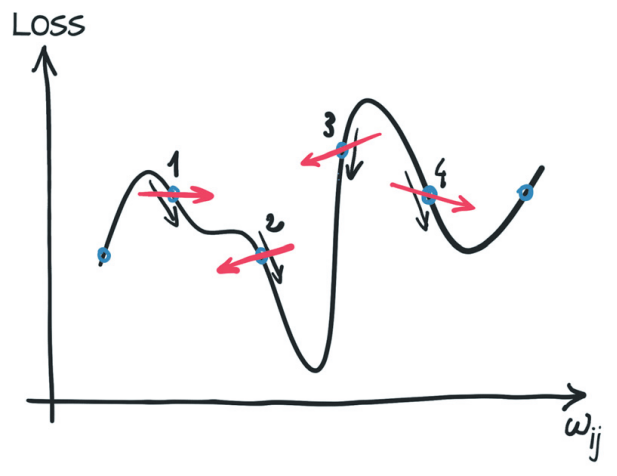
图4.5在离散位置和分析位置评估下坡方向时的估计差异

要计算损失函数相对于参数的导数，您可以应用链式规则，并计算损失相对于其输入（即模型的输出）的导数乘以模型相对于参数的导数：

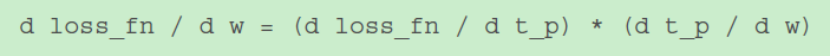

In [13]:
# 有loss_fn可以推出dloss_fn

def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c)
    return dsq_diffs

# 由model可以推出dmodel_dw和dmoel_db

def dmodel_dw(t_u, w,b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

# 返回损耗相对于w和b的梯度的函数为
def grad_fn(t_u,t_c,t_p,w,b):
    dloss_dw = dloss_fn(t_p,t_c) * dmodel_dw(t_u, w, b)
    dloss_db = dloss_fn(t_p,t_c) * dmodel_db(t_u, w, b)
    # 因为t_p,t_c是张量，所以算出来的dloss_dw也是张量，所以要mean
    return torch.stack([dloss_dw.mean(), dloss_db.mean()])

 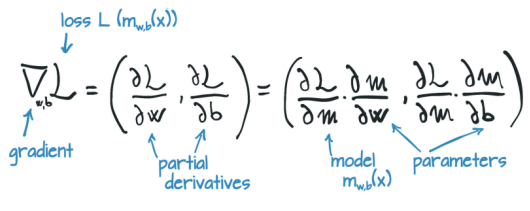
图4.6损失函数相对于权重的导数

#  4.1.7训练循环

从参数的试探值开始，您可以迭代地对其进行更新以进行固定数量的迭代，或者直到w和b停止更改为止。您可以使用多个停止条件，但现在选择固定的迭代次数作为迭代停止条件。

更新所有训练样本的参数的训练迭代称为一个时期（epoch）。

In [14]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs +1):
        w, b = params
        
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c,t_p,w,b)
        
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    return params

In [51]:
# 调用训练循环

training_loop(n_epochs = 100, learning_rate = 1e-2, params = torch.tensor([1.0,1.0]), t_u = t_u, t_c = t_c)

Epoch 1, Loss 1847.484375
Epoch 2, Loss 6071692.500000
Epoch 3, Loss 20308467712.000000
Epoch 4, Loss 67927688609792.000000
Epoch 5, Loss 227204250994737152.000000
Epoch 6, Loss 759951967452542271488.000000
Epoch 7, Loss 2541884375846743705649152.000000
Epoch 8, Loss 8502084863810990502527893504.000000
Epoch 9, Loss 28437755482926060417281331036160.000000
Epoch 10, Loss 95118519314856507330824295963164672.000000
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, Loss nan
Epoch 41, Loss

tensor([nan, nan])

您的训练过程爆炸，导致损失趋于无穷。
这个结果清楚地表明，参数接收的更新太大。

它们的值在每次更新在修正过头后开始来回摆动，而下一个修正则更过头。优化过程不稳定。它发散而不是收敛到最小值。您希望看到对参数的更新越来越小，而不是较大，如图4.7所示。
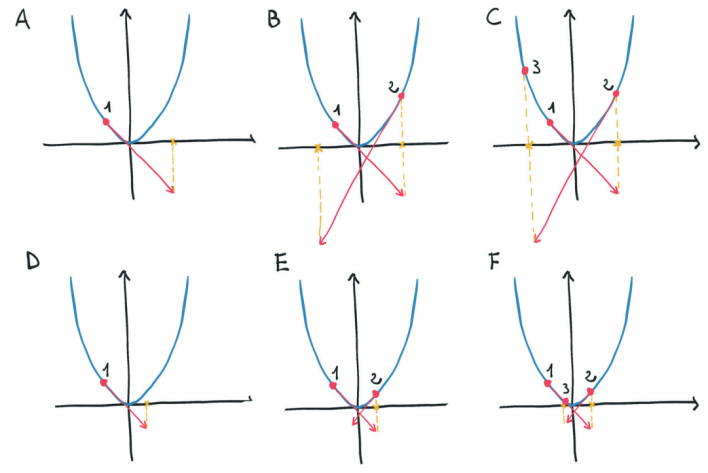
图4.7上图：由于步长较大，导致凸函数（抛物线形）的发散优化。底部：小步长的收敛优化。

In [53]:
#  如何限制learning_rate * grad的大小
# 您可以选择一个较小的learning_rate。通常，您会更改学习率的数量级

training_loop(n_epochs = 100, learning_rate = 1e-4, params = torch.tensor([1.0,1.0]), t_u = t_u, t_c = t_c)

Epoch 1, Loss 1847.484375
Epoch 2, Loss 339.844849
Epoch 3, Loss 84.356087
Epoch 4, Loss 41.059566
Epoch 5, Loss 33.721581
Epoch 6, Loss 32.477219
Epoch 7, Loss 32.265499
Epoch 8, Loss 32.228764
Epoch 9, Loss 32.221684
Epoch 10, Loss 32.219639
Epoch 11, Loss 32.218441
Epoch 12, Loss 32.217381
Epoch 13, Loss 32.216351
Epoch 14, Loss 32.215328
Epoch 15, Loss 32.214298
Epoch 16, Loss 32.213272
Epoch 17, Loss 32.212246
Epoch 18, Loss 32.211224
Epoch 19, Loss 32.210201
Epoch 20, Loss 32.209171
Epoch 21, Loss 32.208141
Epoch 22, Loss 32.207119
Epoch 23, Loss 32.206097
Epoch 24, Loss 32.205074
Epoch 25, Loss 32.204044
Epoch 26, Loss 32.203018
Epoch 27, Loss 32.201996
Epoch 28, Loss 32.200974
Epoch 29, Loss 32.199940
Epoch 30, Loss 32.198914
Epoch 31, Loss 32.197891
Epoch 32, Loss 32.196865
Epoch 33, Loss 32.195839
Epoch 34, Loss 32.194820
Epoch 35, Loss 32.193790
Epoch 36, Loss 32.192764
Epoch 37, Loss 32.191738
Epoch 38, Loss 32.190720
Epoch 39, Loss 32.189693
Epoch 40, Loss 32.188663
Epoch 

tensor([0.2151, 0.9542])

很好，现在收敛行为变得稳定。但是还有另一个问题：参数的更新很小，因此损耗会缓慢下降并最终停滞。

您可以通过使用自适应性的learning_rate来解决此问题，即根据更新的大小进行更改learning_rate

更新术语中存在另一个潜在的麻烦制造者：梯度本身。回到最优化阶段1的grad变量。 您会看到，权重的第一个时期梯度大约是偏置的梯度的50倍，因此权重和偏差存在于不同尺度的空间中。在这种情况下，足够大的学习率足以有意义地更新一个参数，对于另一个参数的更新则是不稳定的，或者适合第二个参数的学习率不足以有意义地改变第一个。除非您更改问题的公式，否则您将无法更新参数。您可以为每个参数设置单独的学习率，但是对于具有多个参数的模型，此方法将非常麻烦。这会非常繁琐。

 您可以采用一种更简单的方法来检查所有内容：更改输入，以使梯度没有太大不同。粗略地说，您可以确保输入范围与-1.0到1.0的范围相差不大。在这种情况下，您可以通过将t_u乘以0.1来达到与该示例足够接近的效果：
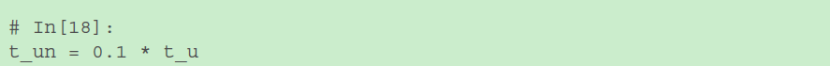
在这里，通过将n附加到变量名来表示t_u的标准化版本。

In [15]:
t_un = 0.1 * t_u
# 此时，您可以在标准化输入上运行训练循环：

training_loop(n_epochs = 100, learning_rate = 1e-2, params = torch.tensor([1.0,1.0]), t_u = t_un, t_c = t_c)

Epoch 1, Loss 70.724350
Epoch 2, Loss 38.657791
Epoch 3, Loss 33.605907
Epoch 4, Loss 32.738144
Epoch 5, Loss 32.518684
Epoch 6, Loss 32.399918
Epoch 7, Loss 32.297031
Epoch 8, Loss 32.196896
Epoch 9, Loss 32.097469
Epoch 10, Loss 31.998436
Epoch 11, Loss 31.899750
Epoch 12, Loss 31.801397
Epoch 13, Loss 31.703386
Epoch 14, Loss 31.605701
Epoch 15, Loss 31.508350
Epoch 16, Loss 31.411329
Epoch 17, Loss 31.314636
Epoch 18, Loss 31.218273
Epoch 19, Loss 31.122234
Epoch 20, Loss 31.026522
Epoch 21, Loss 30.931141
Epoch 22, Loss 30.836077
Epoch 23, Loss 30.741339
Epoch 24, Loss 30.646923
Epoch 25, Loss 30.552824
Epoch 26, Loss 30.459047
Epoch 27, Loss 30.365589
Epoch 28, Loss 30.272444
Epoch 29, Loss 30.179621
Epoch 30, Loss 30.087109
Epoch 31, Loss 29.994917
Epoch 32, Loss 29.903032
Epoch 33, Loss 29.811457
Epoch 34, Loss 29.720198
Epoch 35, Loss 29.629244
Epoch 36, Loss 29.538603
Epoch 37, Loss 29.448271
Epoch 38, Loss 29.358244
Epoch 39, Loss 29.268518
Epoch 40, Loss 29.179102
Epoch 41,

tensor([ 2.6108, -1.6981])

即正则化对于优化此问题的参数不是必要的。这绝对是真的！这个问题很小，您有很多解决方法。但是，对于更大，更复杂的问题，归一化是用于改善模型收敛性的简便有效（如果不是至关重要的话）的工具。

In [27]:
# 运行循环进行足够的迭代(n_epochs)，可以看到参数的变化变小

params = training_loop(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0,1.0]), t_u = t_un, t_c = t_c)

Epoch 1, Loss 70.724350
Epoch 2, Loss 38.657791
Epoch 3, Loss 33.605907
Epoch 4, Loss 32.738144
Epoch 5, Loss 32.518684
Epoch 6, Loss 32.399918
Epoch 7, Loss 32.297031
Epoch 8, Loss 32.196896
Epoch 9, Loss 32.097469
Epoch 10, Loss 31.998436
Epoch 11, Loss 31.899750
Epoch 12, Loss 31.801397
Epoch 13, Loss 31.703386
Epoch 14, Loss 31.605701
Epoch 15, Loss 31.508350
Epoch 16, Loss 31.411329
Epoch 17, Loss 31.314636
Epoch 18, Loss 31.218273
Epoch 19, Loss 31.122234
Epoch 20, Loss 31.026522
Epoch 21, Loss 30.931141
Epoch 22, Loss 30.836077
Epoch 23, Loss 30.741339
Epoch 24, Loss 30.646923
Epoch 25, Loss 30.552824
Epoch 26, Loss 30.459047
Epoch 27, Loss 30.365589
Epoch 28, Loss 30.272444
Epoch 29, Loss 30.179621
Epoch 30, Loss 30.087109
Epoch 31, Loss 29.994917
Epoch 32, Loss 29.903032
Epoch 33, Loss 29.811457
Epoch 34, Loss 29.720198
Epoch 35, Loss 29.629244
Epoch 36, Loss 29.538603
Epoch 37, Loss 29.448271
Epoch 38, Loss 29.358244
Epoch 39, Loss 29.268518
Epoch 40, Loss 29.179102
Epoch 41,

Epoch 379, Loss 11.217075
Epoch 380, Loss 11.188935
Epoch 381, Loss 11.160892
Epoch 382, Loss 11.132944
Epoch 383, Loss 11.105088
Epoch 384, Loss 11.077331
Epoch 385, Loss 11.049664
Epoch 386, Loss 11.022094
Epoch 387, Loss 10.994615
Epoch 388, Loss 10.967231
Epoch 389, Loss 10.939941
Epoch 390, Loss 10.912742
Epoch 391, Loss 10.885632
Epoch 392, Loss 10.858618
Epoch 393, Loss 10.831695
Epoch 394, Loss 10.804862
Epoch 395, Loss 10.778126
Epoch 396, Loss 10.751474
Epoch 397, Loss 10.724916
Epoch 398, Loss 10.698444
Epoch 399, Loss 10.672067
Epoch 400, Loss 10.645778
Epoch 401, Loss 10.619577
Epoch 402, Loss 10.593469
Epoch 403, Loss 10.567444
Epoch 404, Loss 10.541511
Epoch 405, Loss 10.515662
Epoch 406, Loss 10.489904
Epoch 407, Loss 10.464236
Epoch 408, Loss 10.438652
Epoch 409, Loss 10.413155
Epoch 410, Loss 10.387746
Epoch 411, Loss 10.362417
Epoch 412, Loss 10.337182
Epoch 413, Loss 10.312029
Epoch 414, Loss 10.286962
Epoch 415, Loss 10.261981
Epoch 416, Loss 10.237082
Epoch 417, L

Epoch 745, Loss 5.315584
Epoch 746, Loss 5.307477
Epoch 747, Loss 5.299397
Epoch 748, Loss 5.291347
Epoch 749, Loss 5.283324
Epoch 750, Loss 5.275326
Epoch 751, Loss 5.267356
Epoch 752, Loss 5.259414
Epoch 753, Loss 5.251500
Epoch 754, Loss 5.243610
Epoch 755, Loss 5.235748
Epoch 756, Loss 5.227913
Epoch 757, Loss 5.220105
Epoch 758, Loss 5.212322
Epoch 759, Loss 5.204567
Epoch 760, Loss 5.196839
Epoch 761, Loss 5.189135
Epoch 762, Loss 5.181457
Epoch 763, Loss 5.173805
Epoch 764, Loss 5.166181
Epoch 765, Loss 5.158583
Epoch 766, Loss 5.151010
Epoch 767, Loss 5.143463
Epoch 768, Loss 5.135941
Epoch 769, Loss 5.128445
Epoch 770, Loss 5.120974
Epoch 771, Loss 5.113527
Epoch 772, Loss 5.106106
Epoch 773, Loss 5.098712
Epoch 774, Loss 5.091342
Epoch 775, Loss 5.083998
Epoch 776, Loss 5.076678
Epoch 777, Loss 5.069381
Epoch 778, Loss 5.062114
Epoch 779, Loss 5.054867
Epoch 780, Loss 5.047647
Epoch 781, Loss 5.040449
Epoch 782, Loss 5.033278
Epoch 783, Loss 5.026129
Epoch 784, Loss 5.019004


Epoch 1150, Loss 3.530105
Epoch 1151, Loss 3.528059
Epoch 1152, Loss 3.526020
Epoch 1153, Loss 3.523990
Epoch 1154, Loss 3.521966
Epoch 1155, Loss 3.519948
Epoch 1156, Loss 3.517937
Epoch 1157, Loss 3.515933
Epoch 1158, Loss 3.513936
Epoch 1159, Loss 3.511947
Epoch 1160, Loss 3.509960
Epoch 1161, Loss 3.507983
Epoch 1162, Loss 3.506015
Epoch 1163, Loss 3.504053
Epoch 1164, Loss 3.502094
Epoch 1165, Loss 3.500144
Epoch 1166, Loss 3.498202
Epoch 1167, Loss 3.496265
Epoch 1168, Loss 3.494334
Epoch 1169, Loss 3.492409
Epoch 1170, Loss 3.490494
Epoch 1171, Loss 3.488583
Epoch 1172, Loss 3.486678
Epoch 1173, Loss 3.484779
Epoch 1174, Loss 3.482889
Epoch 1175, Loss 3.481004
Epoch 1176, Loss 3.479124
Epoch 1177, Loss 3.477254
Epoch 1178, Loss 3.475389
Epoch 1179, Loss 3.473529
Epoch 1180, Loss 3.471678
Epoch 1181, Loss 3.469828
Epoch 1182, Loss 3.467988
Epoch 1183, Loss 3.466154
Epoch 1184, Loss 3.464328
Epoch 1185, Loss 3.462505
Epoch 1186, Loss 3.460688
Epoch 1187, Loss 3.458880
Epoch 1188, 

Epoch 1540, Loss 3.087593
Epoch 1541, Loss 3.087052
Epoch 1542, Loss 3.086511
Epoch 1543, Loss 3.085972
Epoch 1544, Loss 3.085434
Epoch 1545, Loss 3.084899
Epoch 1546, Loss 3.084366
Epoch 1547, Loss 3.083834
Epoch 1548, Loss 3.083302
Epoch 1549, Loss 3.082775
Epoch 1550, Loss 3.082248
Epoch 1551, Loss 3.081722
Epoch 1552, Loss 3.081199
Epoch 1553, Loss 3.080678
Epoch 1554, Loss 3.080159
Epoch 1555, Loss 3.079642
Epoch 1556, Loss 3.079123
Epoch 1557, Loss 3.078611
Epoch 1558, Loss 3.078097
Epoch 1559, Loss 3.077587
Epoch 1560, Loss 3.077078
Epoch 1561, Loss 3.076569
Epoch 1562, Loss 3.076065
Epoch 1563, Loss 3.075561
Epoch 1564, Loss 3.075061
Epoch 1565, Loss 3.074559
Epoch 1566, Loss 3.074061
Epoch 1567, Loss 3.073564
Epoch 1568, Loss 3.073068
Epoch 1569, Loss 3.072574
Epoch 1570, Loss 3.072083
Epoch 1571, Loss 3.071592
Epoch 1572, Loss 3.071104
Epoch 1573, Loss 3.070617
Epoch 1574, Loss 3.070131
Epoch 1575, Loss 3.069647
Epoch 1576, Loss 3.069164
Epoch 1577, Loss 3.068684
Epoch 1578, 

Epoch 1969, Loss 2.964839
Epoch 1970, Loss 2.964713
Epoch 1971, Loss 2.964586
Epoch 1972, Loss 2.964463
Epoch 1973, Loss 2.964337
Epoch 1974, Loss 2.964211
Epoch 1975, Loss 2.964088
Epoch 1976, Loss 2.963964
Epoch 1977, Loss 2.963841
Epoch 1978, Loss 2.963718
Epoch 1979, Loss 2.963596
Epoch 1980, Loss 2.963473
Epoch 1981, Loss 2.963352
Epoch 1982, Loss 2.963232
Epoch 1983, Loss 2.963109
Epoch 1984, Loss 2.962989
Epoch 1985, Loss 2.962869
Epoch 1986, Loss 2.962749
Epoch 1987, Loss 2.962631
Epoch 1988, Loss 2.962513
Epoch 1989, Loss 2.962392
Epoch 1990, Loss 2.962276
Epoch 1991, Loss 2.962157
Epoch 1992, Loss 2.962041
Epoch 1993, Loss 2.961924
Epoch 1994, Loss 2.961807
Epoch 1995, Loss 2.961693
Epoch 1996, Loss 2.961577
Epoch 1997, Loss 2.961461
Epoch 1998, Loss 2.961346
Epoch 1999, Loss 2.961231
Epoch 2000, Loss 2.961117
Epoch 2001, Loss 2.961005
Epoch 2002, Loss 2.960890
Epoch 2003, Loss 2.960778
Epoch 2004, Loss 2.960666
Epoch 2005, Loss 2.960552
Epoch 2006, Loss 2.960441
Epoch 2007, 

Epoch 2337, Loss 2.938289
Epoch 2338, Loss 2.938251
Epoch 2339, Loss 2.938215
Epoch 2340, Loss 2.938180
Epoch 2341, Loss 2.938143
Epoch 2342, Loss 2.938108
Epoch 2343, Loss 2.938074
Epoch 2344, Loss 2.938036
Epoch 2345, Loss 2.938003
Epoch 2346, Loss 2.937966
Epoch 2347, Loss 2.937931
Epoch 2348, Loss 2.937897
Epoch 2349, Loss 2.937863
Epoch 2350, Loss 2.937827
Epoch 2351, Loss 2.937793
Epoch 2352, Loss 2.937757
Epoch 2353, Loss 2.937724
Epoch 2354, Loss 2.937689
Epoch 2355, Loss 2.937656
Epoch 2356, Loss 2.937622
Epoch 2357, Loss 2.937588
Epoch 2358, Loss 2.937554
Epoch 2359, Loss 2.937521
Epoch 2360, Loss 2.937487
Epoch 2361, Loss 2.937454
Epoch 2362, Loss 2.937421
Epoch 2363, Loss 2.937387
Epoch 2364, Loss 2.937355
Epoch 2365, Loss 2.937322
Epoch 2366, Loss 2.937289
Epoch 2367, Loss 2.937256
Epoch 2368, Loss 2.937222
Epoch 2369, Loss 2.937190
Epoch 2370, Loss 2.937158
Epoch 2371, Loss 2.937125
Epoch 2372, Loss 2.937094
Epoch 2373, Loss 2.937060
Epoch 2374, Loss 2.937027
Epoch 2375, 

Epoch 2675, Loss 2.931018
Epoch 2676, Loss 2.931007
Epoch 2677, Loss 2.930994
Epoch 2678, Loss 2.930982
Epoch 2679, Loss 2.930972
Epoch 2680, Loss 2.930961
Epoch 2681, Loss 2.930948
Epoch 2682, Loss 2.930937
Epoch 2683, Loss 2.930927
Epoch 2684, Loss 2.930917
Epoch 2685, Loss 2.930905
Epoch 2686, Loss 2.930894
Epoch 2687, Loss 2.930882
Epoch 2688, Loss 2.930872
Epoch 2689, Loss 2.930860
Epoch 2690, Loss 2.930850
Epoch 2691, Loss 2.930838
Epoch 2692, Loss 2.930828
Epoch 2693, Loss 2.930818
Epoch 2694, Loss 2.930806
Epoch 2695, Loss 2.930798
Epoch 2696, Loss 2.930786
Epoch 2697, Loss 2.930775
Epoch 2698, Loss 2.930762
Epoch 2699, Loss 2.930755
Epoch 2700, Loss 2.930743
Epoch 2701, Loss 2.930731
Epoch 2702, Loss 2.930720
Epoch 2703, Loss 2.930710
Epoch 2704, Loss 2.930701
Epoch 2705, Loss 2.930691
Epoch 2706, Loss 2.930679
Epoch 2707, Loss 2.930669
Epoch 2708, Loss 2.930659
Epoch 2709, Loss 2.930650
Epoch 2710, Loss 2.930640
Epoch 2711, Loss 2.930630
Epoch 2712, Loss 2.930620
Epoch 2713, 

Epoch 2993, Loss 2.928791
Epoch 2994, Loss 2.928786
Epoch 2995, Loss 2.928781
Epoch 2996, Loss 2.928779
Epoch 2997, Loss 2.928774
Epoch 2998, Loss 2.928771
Epoch 2999, Loss 2.928766
Epoch 3000, Loss 2.928763
Epoch 3001, Loss 2.928759
Epoch 3002, Loss 2.928756
Epoch 3003, Loss 2.928753
Epoch 3004, Loss 2.928746
Epoch 3005, Loss 2.928743
Epoch 3006, Loss 2.928740
Epoch 3007, Loss 2.928737
Epoch 3008, Loss 2.928732
Epoch 3009, Loss 2.928728
Epoch 3010, Loss 2.928724
Epoch 3011, Loss 2.928723
Epoch 3012, Loss 2.928718
Epoch 3013, Loss 2.928715
Epoch 3014, Loss 2.928711
Epoch 3015, Loss 2.928708
Epoch 3016, Loss 2.928704
Epoch 3017, Loss 2.928699
Epoch 3018, Loss 2.928697
Epoch 3019, Loss 2.928692
Epoch 3020, Loss 2.928690
Epoch 3021, Loss 2.928685
Epoch 3022, Loss 2.928684
Epoch 3023, Loss 2.928679
Epoch 3024, Loss 2.928675
Epoch 3025, Loss 2.928672
Epoch 3026, Loss 2.928668
Epoch 3027, Loss 2.928665
Epoch 3028, Loss 2.928662
Epoch 3029, Loss 2.928658
Epoch 3030, Loss 2.928654
Epoch 3031, 

Epoch 3353, Loss 2.927981
Epoch 3354, Loss 2.927981
Epoch 3355, Loss 2.927981
Epoch 3356, Loss 2.927978
Epoch 3357, Loss 2.927978
Epoch 3358, Loss 2.927976
Epoch 3359, Loss 2.927975
Epoch 3360, Loss 2.927975
Epoch 3361, Loss 2.927971
Epoch 3362, Loss 2.927970
Epoch 3363, Loss 2.927971
Epoch 3364, Loss 2.927970
Epoch 3365, Loss 2.927969
Epoch 3366, Loss 2.927967
Epoch 3367, Loss 2.927967
Epoch 3368, Loss 2.927966
Epoch 3369, Loss 2.927965
Epoch 3370, Loss 2.927963
Epoch 3371, Loss 2.927963
Epoch 3372, Loss 2.927959
Epoch 3373, Loss 2.927960
Epoch 3374, Loss 2.927959
Epoch 3375, Loss 2.927959
Epoch 3376, Loss 2.927958
Epoch 3377, Loss 2.927956
Epoch 3378, Loss 2.927955
Epoch 3379, Loss 2.927953
Epoch 3380, Loss 2.927953
Epoch 3381, Loss 2.927952
Epoch 3382, Loss 2.927950
Epoch 3383, Loss 2.927950
Epoch 3384, Loss 2.927947
Epoch 3385, Loss 2.927947
Epoch 3386, Loss 2.927947
Epoch 3387, Loss 2.927945
Epoch 3388, Loss 2.927944
Epoch 3389, Loss 2.927943
Epoch 3390, Loss 2.927941
Epoch 3391, 

Epoch 3829, Loss 2.927714
Epoch 3830, Loss 2.927713
Epoch 3831, Loss 2.927712
Epoch 3832, Loss 2.927712
Epoch 3833, Loss 2.927711
Epoch 3834, Loss 2.927711
Epoch 3835, Loss 2.927712
Epoch 3836, Loss 2.927711
Epoch 3837, Loss 2.927712
Epoch 3838, Loss 2.927710
Epoch 3839, Loss 2.927710
Epoch 3840, Loss 2.927711
Epoch 3841, Loss 2.927709
Epoch 3842, Loss 2.927711
Epoch 3843, Loss 2.927709
Epoch 3844, Loss 2.927709
Epoch 3845, Loss 2.927709
Epoch 3846, Loss 2.927709
Epoch 3847, Loss 2.927707
Epoch 3848, Loss 2.927708
Epoch 3849, Loss 2.927707
Epoch 3850, Loss 2.927707
Epoch 3851, Loss 2.927708
Epoch 3852, Loss 2.927708
Epoch 3853, Loss 2.927707
Epoch 3854, Loss 2.927706
Epoch 3855, Loss 2.927707
Epoch 3856, Loss 2.927707
Epoch 3857, Loss 2.927707
Epoch 3858, Loss 2.927706
Epoch 3859, Loss 2.927706
Epoch 3860, Loss 2.927707
Epoch 3861, Loss 2.927705
Epoch 3862, Loss 2.927705
Epoch 3863, Loss 2.927704
Epoch 3864, Loss 2.927706
Epoch 3865, Loss 2.927704
Epoch 3866, Loss 2.927704
Epoch 3867, 

Epoch 4240, Loss 2.927661
Epoch 4241, Loss 2.927662
Epoch 4242, Loss 2.927663
Epoch 4243, Loss 2.927663
Epoch 4244, Loss 2.927662
Epoch 4245, Loss 2.927660
Epoch 4246, Loss 2.927664
Epoch 4247, Loss 2.927663
Epoch 4248, Loss 2.927662
Epoch 4249, Loss 2.927662
Epoch 4250, Loss 2.927663
Epoch 4251, Loss 2.927663
Epoch 4252, Loss 2.927662
Epoch 4253, Loss 2.927661
Epoch 4254, Loss 2.927660
Epoch 4255, Loss 2.927661
Epoch 4256, Loss 2.927662
Epoch 4257, Loss 2.927662
Epoch 4258, Loss 2.927661
Epoch 4259, Loss 2.927661
Epoch 4260, Loss 2.927662
Epoch 4261, Loss 2.927662
Epoch 4262, Loss 2.927661
Epoch 4263, Loss 2.927660
Epoch 4264, Loss 2.927662
Epoch 4265, Loss 2.927662
Epoch 4266, Loss 2.927661
Epoch 4267, Loss 2.927660
Epoch 4268, Loss 2.927660
Epoch 4269, Loss 2.927660
Epoch 4270, Loss 2.927662
Epoch 4271, Loss 2.927660
Epoch 4272, Loss 2.927660
Epoch 4273, Loss 2.927661
Epoch 4274, Loss 2.927661
Epoch 4275, Loss 2.927661
Epoch 4276, Loss 2.927660
Epoch 4277, Loss 2.927662
Epoch 4278, 

Epoch 4565, Loss 2.927652
Epoch 4566, Loss 2.927651
Epoch 4567, Loss 2.927651
Epoch 4568, Loss 2.927653
Epoch 4569, Loss 2.927653
Epoch 4570, Loss 2.927650
Epoch 4571, Loss 2.927651
Epoch 4572, Loss 2.927651
Epoch 4573, Loss 2.927651
Epoch 4574, Loss 2.927651
Epoch 4575, Loss 2.927650
Epoch 4576, Loss 2.927651
Epoch 4577, Loss 2.927652
Epoch 4578, Loss 2.927650
Epoch 4579, Loss 2.927651
Epoch 4580, Loss 2.927649
Epoch 4581, Loss 2.927650
Epoch 4582, Loss 2.927650
Epoch 4583, Loss 2.927651
Epoch 4584, Loss 2.927651
Epoch 4585, Loss 2.927651
Epoch 4586, Loss 2.927650
Epoch 4587, Loss 2.927650
Epoch 4588, Loss 2.927651
Epoch 4589, Loss 2.927652
Epoch 4590, Loss 2.927650
Epoch 4591, Loss 2.927651
Epoch 4592, Loss 2.927652
Epoch 4593, Loss 2.927653
Epoch 4594, Loss 2.927651
Epoch 4595, Loss 2.927650
Epoch 4596, Loss 2.927651
Epoch 4597, Loss 2.927651
Epoch 4598, Loss 2.927650
Epoch 4599, Loss 2.927650
Epoch 4600, Loss 2.927651
Epoch 4601, Loss 2.927651
Epoch 4602, Loss 2.927651
Epoch 4603, 

Epoch 4986, Loss 2.927647
Epoch 4987, Loss 2.927647
Epoch 4988, Loss 2.927648
Epoch 4989, Loss 2.927646
Epoch 4990, Loss 2.927648
Epoch 4991, Loss 2.927647
Epoch 4992, Loss 2.927648
Epoch 4993, Loss 2.927646
Epoch 4994, Loss 2.927648
Epoch 4995, Loss 2.927647
Epoch 4996, Loss 2.927647
Epoch 4997, Loss 2.927648
Epoch 4998, Loss 2.927646
Epoch 4999, Loss 2.927647
Epoch 5000, Loss 2.927647


损失并没有为零，这可能意味着迭代不足以收敛为零，或者数据点不在一条线上。如预期的那样，您的测量结果并非十分准确，或者读数中包含噪音。

但是请注意：w和b的值看起来非常糟糕，就像将摄氏度转换为华氏度所需要的数字一样（在考虑了将输入乘以0.1的较早归一化之后）。确切值是w = 5.5556和b = -17.7778。您的温度计一直在显示华氏温度，这并不是什么大发现，但可以证明您的梯度下降优化过程非常有效。

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

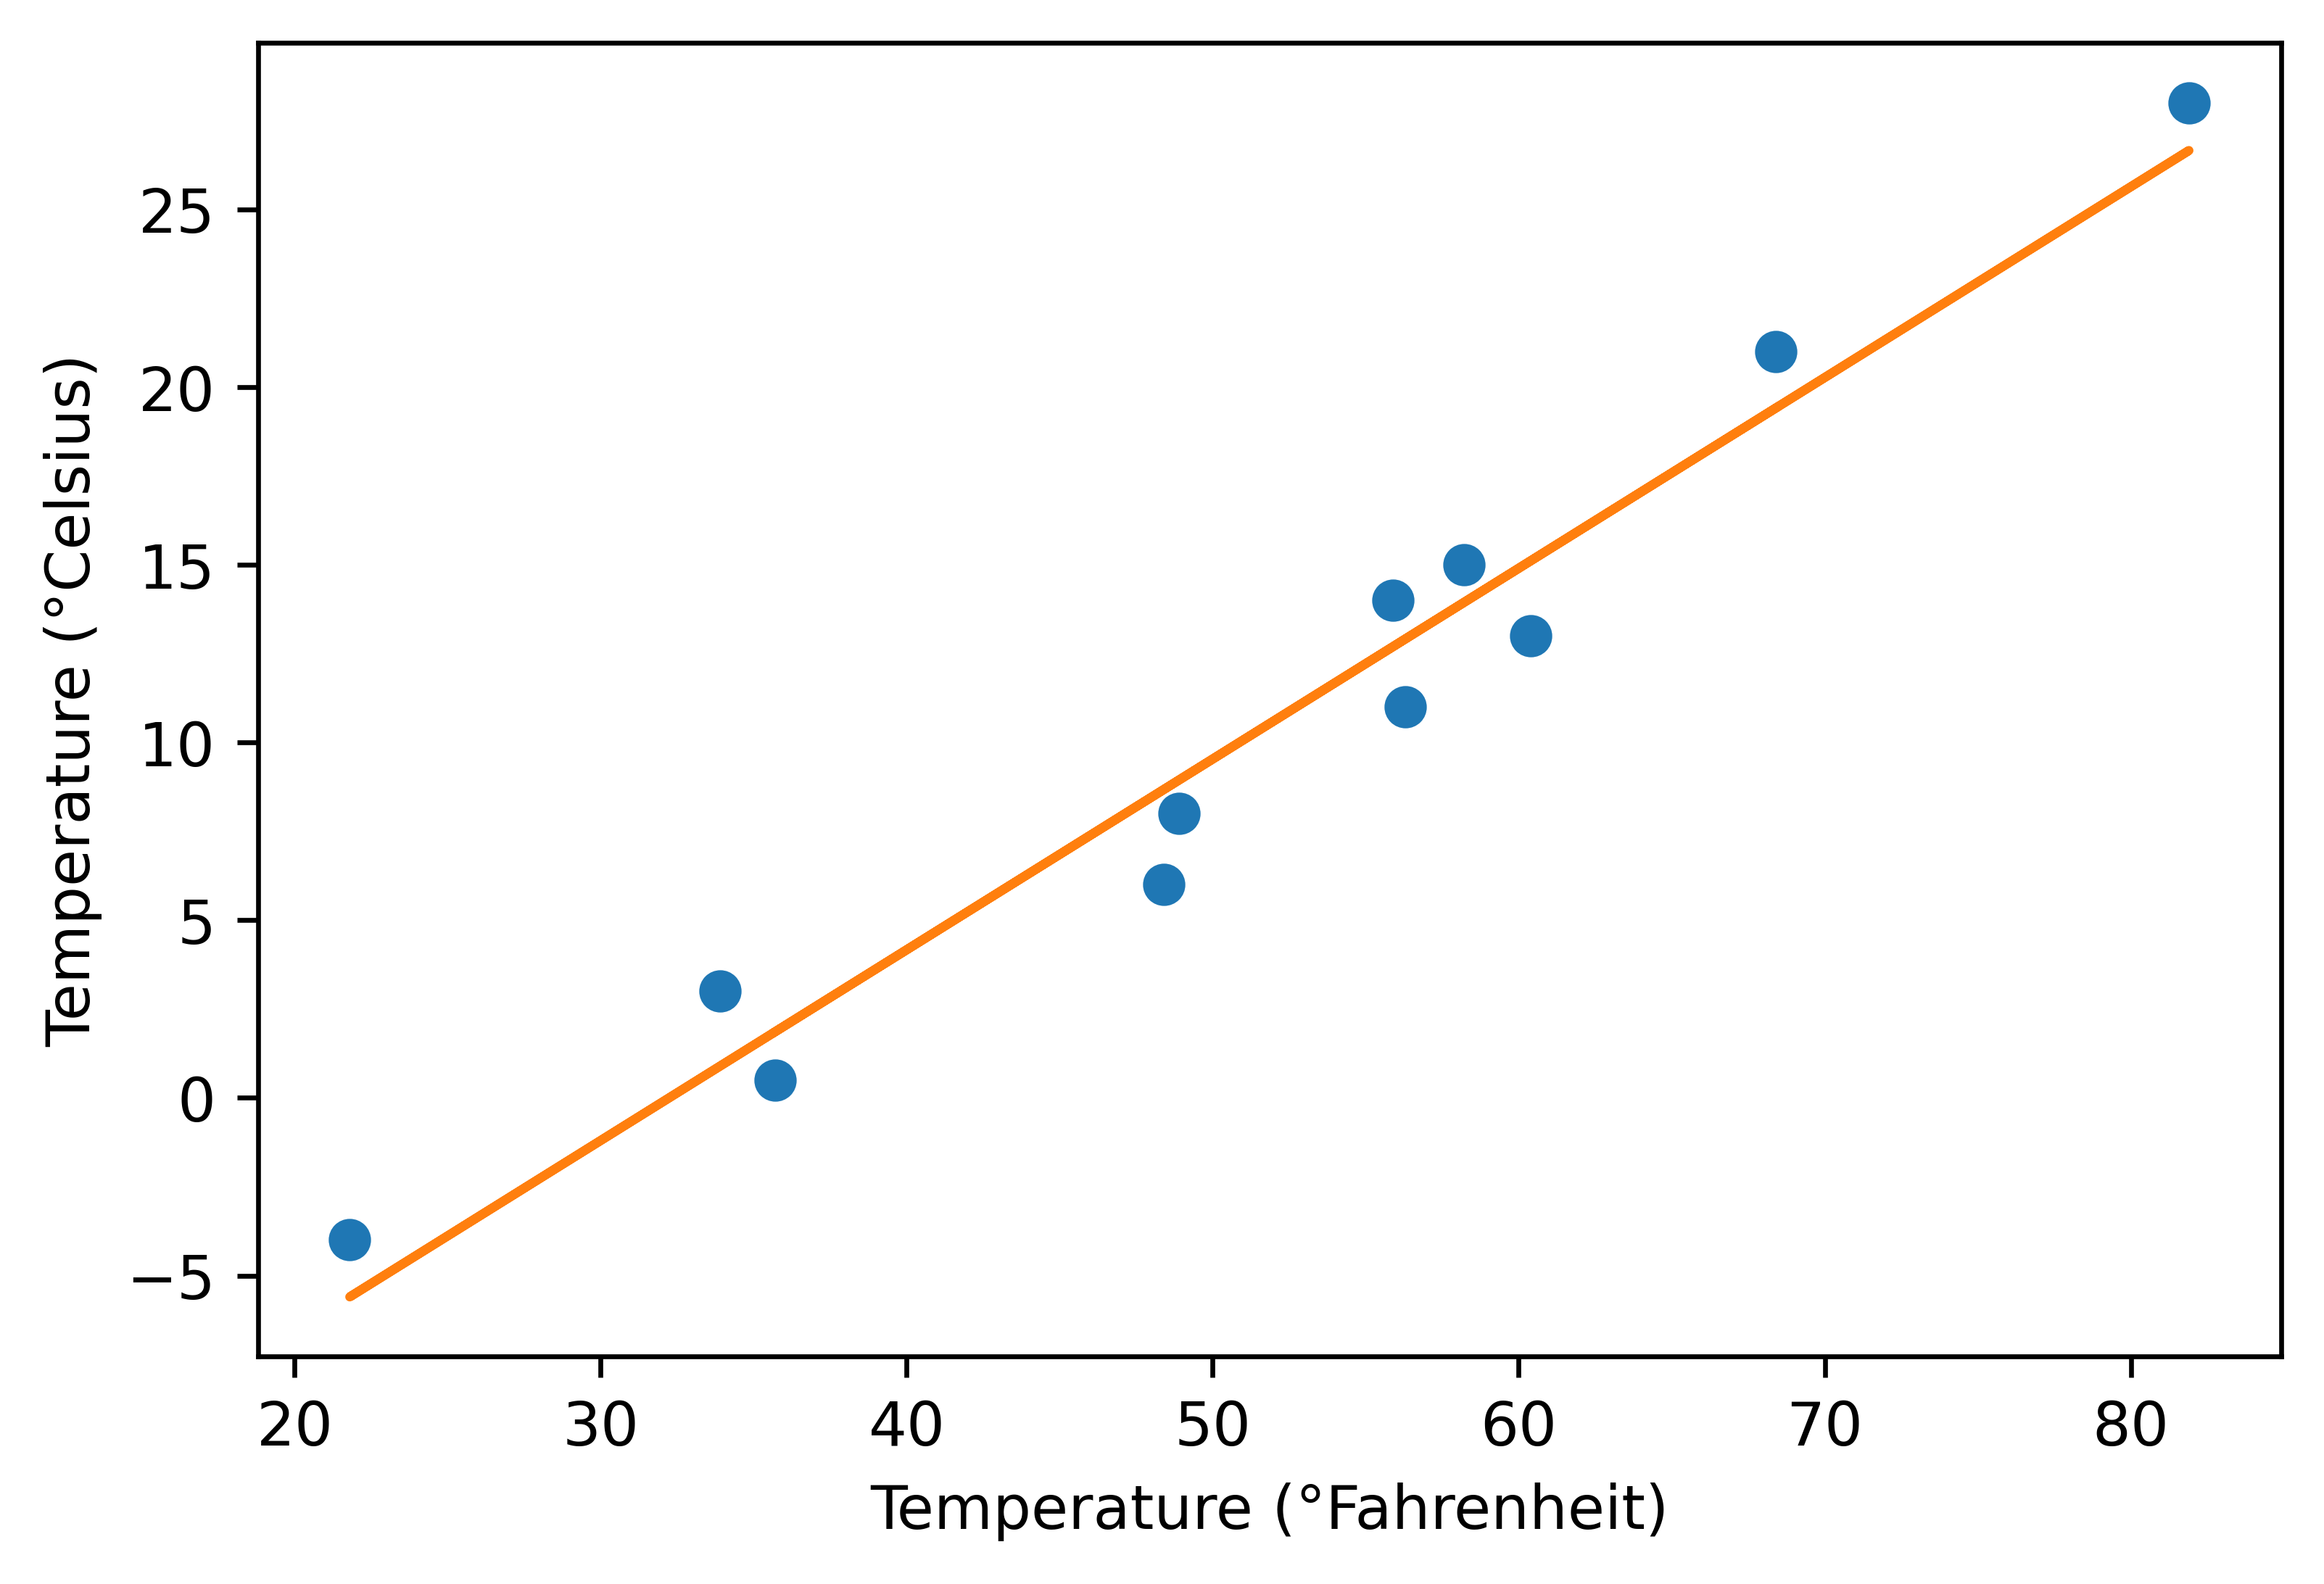

In [29]:
# 上面N_epochs = 5000求得的w,b
t_p = model(t_un ,*params)

fig = plt.figure(dpi = 600) # dpi 为设置图形每英寸的点数 
plt.xlabel("Temperature (°Fahrenheit)")# 华氏度
plt.ylabel("Temperature (°Celsius)")# 摄氏度

plt.plot(t_u.numpy(), t_c.numpy(), 'o') # o表示点，不是颜色orange
plt.plot(t_u.numpy(), t_p.numpy())
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

In [19]:
# 线性拟合模型（实线）与输入数据（圆圈）的关系图

# 4.2 PyTorch的autograd: 将一切都后向传播

通过链式法则向后传播导数，可以计算出函数组成（模型和损失）相对于它们的最内层参数w和b的梯度。基本要求是您要处理的所有函数在数学分析上都是可微分的。在这种情况下，您可以一次扫描相对于参数的梯度（我们之前称其为“损耗变化率”）。

当然，为线性和非线性函数的较深组成部分的导数编写分析表达式并不是一件很有趣的事情。它也不是特别快。

PyTorch张量就可以通过一个名为autograd的PyTorch组件来解决

In [42]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p,t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

params = torch.tensor([1.0,0.0], requires_grad = True)

requires_grad = True参数告诉PyTorch跟踪由参数操作产生的整个张量族谱。

换句话说，任何具有该参数作为祖先的张量都可以访问从它到该张量所调用的函数链。

如果这些函数是可微的（大多数PyTorch张量运算是可微的），则导数的值将自动保存在参数张量的grad属性。

通常，所有PyTorch张量都有一个名为grad的属性，通常为None：

In [45]:
params.grad is None

True

In [46]:
# 您要做的就是从将require_grad设置为True的张量开始，调用模型、计算损失，然后向后调用损失张量：

loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad
# 可以看到 params的grad属性包含关于参数的每个元素的损失的偏导数

tensor([4517.2969,   82.6000])

 您可以使用任意数量的张量（将require_grad设置为True）和使用任何函数组成。在这种情况下，PyTorch会在整个函数链（计算图）中计算损失的导数，并在这些张量的grad属性（图的叶节点）中累积其值。
 
#### 警报：大陷阱。 这是PyTorch的新手（以及很多经验丰富的人）经常犯的错误。我们这里写的是积累，而不是存储。

#### 警告 调用backward函数会导致导数在叶节点处累积。将其用于参数更新后，需要将其显式清零。

为防止这种情况发生，您需要在每次迭代时将梯度显式归零。您可以使用原地函数zero_方法轻松地做到这一点：
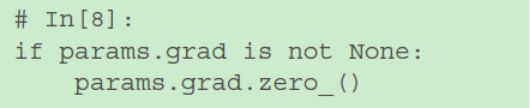

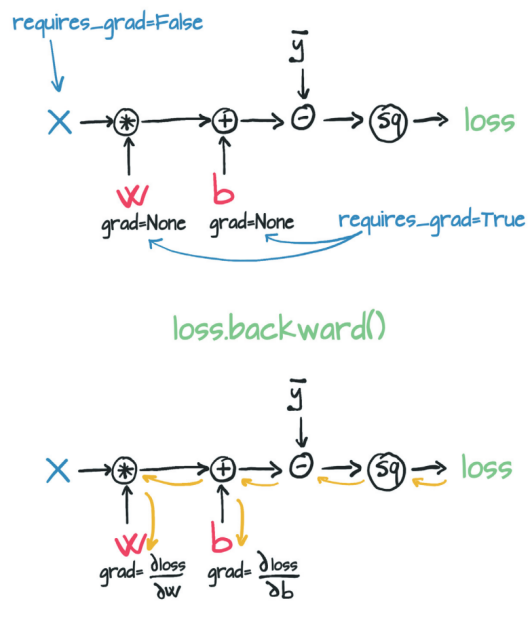
图4.9使用autograd计算的模型的正向图和反向图

In [48]:
if params.grad is not None:
    params.grad.zero_()


tensor([0., 0.])

In [62]:
# 现在开始看看启用了autograd的训练代码的样子

def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1,n_epochs +1):
        
        # 梯度归零
        if params.grad is not None:
            params.grad.zero_()
            
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward() # 这样梯度就算出来了
        
        # 根据梯度，更新参数
        params = (params - learning_rate * params.grad).detach().requires_grad_()
        
        if epoch % 500 == 0:
            print('Epoch % d, Loss %f' % (epoch, float(loss)))
            
    return params

请注意，更新参数时，您还执行了奇怪的.detach().requires_ grad_()。

要了解原因，请考虑一下您构建的计算图。重新格式化参数更新行，以免重复使用变量名：p1 =（p0 * lr * p0.grad）在这里，p0是用于初始化模型的随机权重。p0.grad是通过损失函数根据p0和您的训练数据的组合来计算的。

到目前为止，一切都很好。现在，您需要查看循环的第二次迭代：p2 =（p1 * lr * p1.grad）。 如您所见，p1的计算图回到p0，这是有问题的，因为（a）您必须将p0保留在内存中（直到您完成训练），并且（b）混淆了哪里的问题 您应该通过反向传播分配误差。

而是通过调用.detatch（）将新的参数张量从与其更新表达式关联的计算图中分离出来。 这样，params实际上会丢失生成它的操作的内存。然后，您可以通过调用.requires_grad_（）重新启用跟踪，该操作是in_place操作（请参见trailing_），可重新激活张量的自动梯度。现在，您可以释放旧版本参数所拥有的内存，并且只需通过当前权重进行反向传播。

In [63]:
t_un = 0.1 * t_u

training_loop(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0,0.0], requires_grad =True), t_u = t_un, t_c = t_c)

Epoch  500, Loss 7.860115
Epoch  1000, Loss 3.828538
Epoch  1500, Loss 3.092191
Epoch  2000, Loss 2.957698
Epoch  2500, Loss 2.933134
Epoch  3000, Loss 2.928648
Epoch  3500, Loss 2.927830
Epoch  4000, Loss 2.927679
Epoch  4500, Loss 2.927652
Epoch  5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [64]:
# 获得与以前相同的结果,但省去自己计算参数的过程

# 4.2.1优化器菜单

现在是时候介绍PyTorch从用户代码中为优化策略的方式写摘要了，例如训练循环，使您免于必须自己更新模型中每个参数的繁琐工作。torch模块有一个optim子模块，您可以在其中找到实现不同优化算法的类。

In [66]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

每个优化器构造函数都将参数列表（也称为PyTorch张量，通常将require_grad设置为True）作为第一个输入。传递给优化器的所有参数都保留在优化器对象内，以便优化器可以更新其值并访问其grad属性，如图4.10所示。

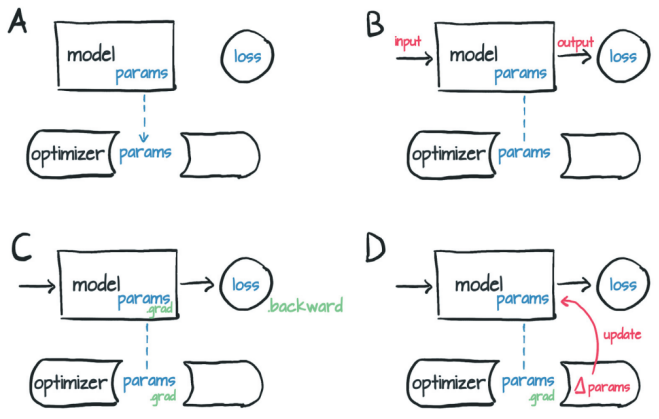

图4.10是优化器如何保留对参数（A）的引用的概念表示，在根据输入（B）计算损失之后，对.backward的调用导致在参数（C）上产生.grad属性。此时，优化器可以访问.grad并计算参数更新（D）。

每个优化器都公开两种方法：zero_grad和step。前者将构造时传递给优化器的所有参数的grad属性归零。后者根据特定优化器实施的优化策略更新这些参数的值。

In [77]:
# 创建参数并实例化梯度下降优化器：

params = torch.tensor([1.0,0.0], requires_grad = True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr = learning_rate)
# SGD代表随机梯度下降

优化器本身是原始的梯度下降（只要momentum参数设置为0.0，这是默认值）

术语“随机”来自以下事实：通常通过对所有输入样本的随机子集（称为最小批量）求平均值来获得梯度。

但是，优化器本身并不知道是对所有样本（朴素）还是对其随机子集（随机）进行了损失计算，因此两种情况下的算法相同。

In [78]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

optimizer.step() # 相当于更新参数的过程

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

optimizer.step() 

优化器通过从中减去learning_rate和grad的乘积来查看params.grad和更新的params，与您以前的手动编写代码完全相同。

####  大陷阱几乎吸引了您：您忘了将梯度归零。

 如果您在循环中调用了前面的代码，则在每次调用backwards时，梯度都会在叶子节点中累积，并且梯度下降遍布到各处！

In [80]:
# 训练循环
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1,n_epochs +1):
            
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad() # 梯度清零
        loss.backward() # 这样梯度就算出来了
        optimizer.step() ##根据梯度，更新参数
        
        if epoch % 500 == 0:
            print('Epoch % d, Loss %f' % (epoch, float(loss)))
            
    return params

params = torch.tensor([1.0,0.0],requires_grad = True)
learning_rate = 1e-2
# 定义优化器，传入需优化的参数及学习率（及更新的步长）
optimizer = optim.SGD([params], lr =learning_rate) 

training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_u, t_c = t_c)

Epoch  500, Loss nan
Epoch  1000, Loss nan
Epoch  1500, Loss nan
Epoch  2000, Loss nan
Epoch  2500, Loss nan
Epoch  3000, Loss nan
Epoch  3500, Loss nan
Epoch  4000, Loss nan
Epoch  4500, Loss nan
Epoch  5000, Loss nan


tensor([nan, nan], requires_grad=True)

除了SGD优化器，

还有Adam优化器（其中自适应地设置了学习率，此外，它对参数缩放的敏感度要低得多，因为它不敏感，您可以返回使用原始（非标准化）

In [83]:
# 在代码层面，只需要把上面的SGD改成adam即可

# 4.2.2训练、验证和过拟合

本节讨论如何分割样本，从而为学习更好地控制自动梯度。

适应性强的模型往往会使用其许多参数来确保在数据点处的损失最小，但是您无法保证该模型在远离数据点或在数据点之间表现良好。


可以肯定的是，如果您有独立的数据点，而不是用来评估损失或沿其负梯度下降，那么您很快就会发现，在那些独立的数据点上评估损失会产生高于预期的损失

我们已经提到过这种现象，这称为过拟合。

在拟合模型时，您可以在训练集上一次评估损失，在验证集上一次评估损失。当您尝试确定是否已将模型适合数据时，您必须查看每个数据集！

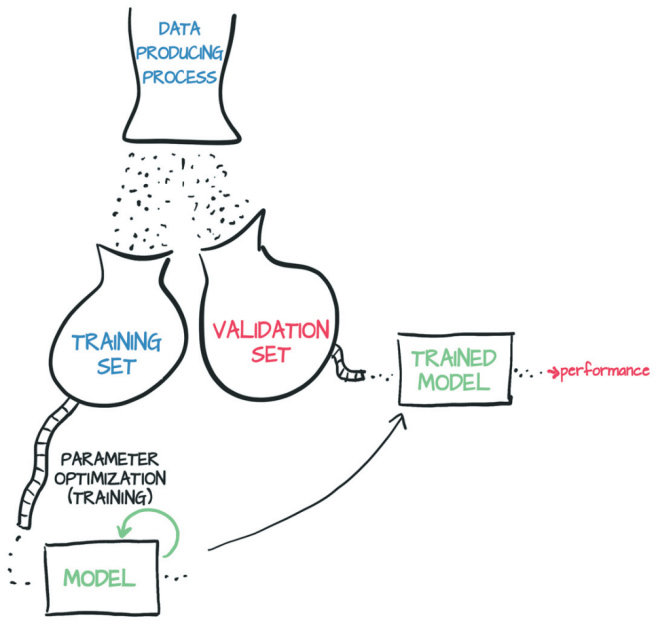

图4.11 数据生成过程的概念表示以及训练数据和独立验证数据的收集和使用

深度神经网络可以潜在地近似复杂的函数，前提是神经元（即参数）的数量足够高。参数越少，网络将能够近似的函数形状越简单。

因此，这是一条规则：**如果训练损失没有减少，则该模型对于数据来说太简单了。另一种可能性是您的数据不包含有意义的信息以用于解释输出**（如果商店里的家伙卖给您的是气压计而不是温度计，那么。。。）

**第二条规则：如果训练损失和验证损失相差很大，则说明您过拟合了。**

### 怎样解决过拟合

**1.在损失函数中添加所谓的惩罚项，以使模型的行为更平稳，变化更慢（在一些点上）。**

**2.在输入样本中添加噪声，在训练数据样本之间人为地创建新的数据点，并迫使模型也尝试拟合它们。**

至少作为第一步，您可以为自己做的最大努力就是简化模型

  简单的模型可能无法像较复杂的模型那样完美地拟合训练数据，但在数据点之间的行为可能会更规则。
  
一方面，您需要进行建模以具有足够的能力来拟合训练集。

另一方面，模型需要避免过拟合。

因此，就参数而言，选择正确大小的神经网络模型的过程基于两个步骤：增大大小直到拟合为止，然后缩小直到不再过拟合。

In [92]:
# 以相同的方式对t_u和t_c进行打乱，然后将生成的张量随机分为两部分，将数据分为训练集和验证集



n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)#20%的数据用于验证，80%用于train

# 对张量的元素进行打乱等于找到其索引的排列(randperm 函数)
shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[: -n_val]
val_indices = shuffled_indices[-n_val: ]

train_indices, val_indices

(tensor([ 9,  4,  5,  8,  3,  7,  1,  2, 10]), tensor([0, 6]))

In [101]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [102]:
# 训练循环没改变，只是传入的参数变了(都加个train_)
def training_loop(n_epochs, optimizer, params, train_t_u,val_t_u, train_t_c, val_t_c):
    for epoch in range(1,n_epochs +1):
            
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad() # 梯度清零
        train_loss.backward() # 这样梯度就算出来了
        optimizer.step() ##根据梯度，更新参数
        
        if epoch <=3 or epoch % 500 == 0:
            print('Epoch  {},Training Loss {}, Validation Loss {}'.format(epoch, float(train_loss), float(val_loss)))
            
    return params

params = torch.tensor([1.0,0.0],requires_grad = True)
learning_rate = 1e-2
# 定义优化器，传入需优化的参数及学习率（及更新的步长）
optimizer = optim.SGD([params], lr =learning_rate) 

training_loop(n_epochs = 3000, optimizer = optimizer, params = params, train_t_u = train_t_un,val_t_u = val_t_un, train_t_c = train_t_c, val_t_c = val_t_c)

Epoch  1,Training Loss 97.15896606445312, Validation Loss 4.788500785827637
Epoch  2,Training Loss 33.20244216918945, Validation Loss 29.74732780456543
Epoch  3,Training Loss 26.74291229248047, Validation Loss 42.758033752441406
Epoch  500,Training Loss 8.718823432922363, Validation Loss 12.488903999328613
Epoch  1000,Training Loss 4.325908660888672, Validation Loss 4.3778252601623535
Epoch  1500,Training Loss 3.2235476970672607, Validation Loss 3.008577823638916
Epoch  2000,Training Loss 2.9469170570373535, Validation Loss 2.9986791610717773
Epoch  2500,Training Loss 2.8774969577789307, Validation Loss 3.1633658409118652
Epoch  3000,Training Loss 2.860079765319824, Validation Loss 3.2884323596954346


tensor([  5.4078, -17.5912], requires_grad=True)

验证集很小，因此验证损失仅在一定程度上有意义。无论如何，请注意，验证损失比您的训练损失要高，尽管相差不大。

由于模型参数是由训练集定型的，因此可以预期模型在训练集上表现更好的事实。您的主要目标是同时减少训练损失和验证损失。

尽管在理想情况下，只要验证损失与训练损失保持合理的距离，这两个损失将大致相同，但是您知道您的模型正在继续学习有关数据的泛化知识。

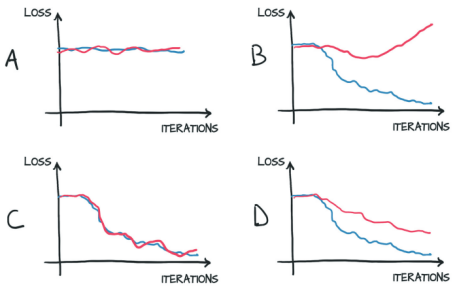

训练（蓝色）和验证（红色）损失的过拟合场景。

情况C是理想的，而情况D是可接受的。在情况A中，模型根本没有学习，在情况B中，您看到过拟合。

（A）训练和验证损失不会减少； 由于数据中没有信息或模型能力不足，因此该模型无法学习。

（B）训练损失减少而验证损失增加（过度拟合

C）训练损失和验证损失同时减少； 由于该模型并非处于过拟合的极限，因此性能可能会进一步提高。

（D）训练和验证损失具有不同的绝对数值，但趋势相似；过拟合在控制之下。

# 4.2.3自动微分中的小问题并将其关闭

对模型进行两次评估（一次在train_t_u上，然后在val_t_u上），然后调用backward。这不会使autograd变得混乱吗？验证集传递过程中生成的值会不会影响backward函数？

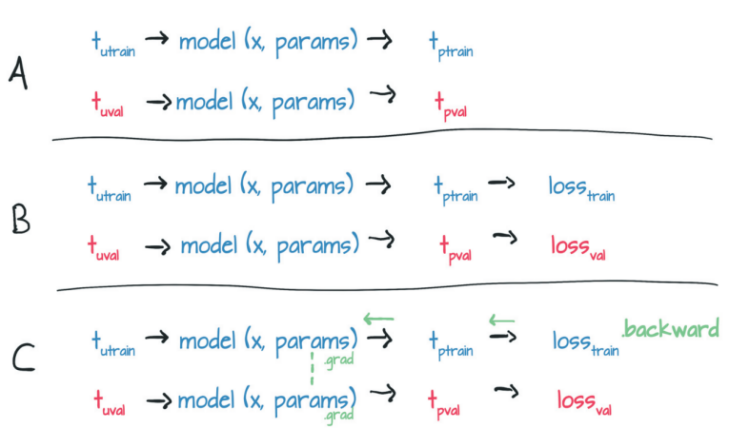
图4.14该图显示了当在其中一个上调用.backward时，梯度如何通过具有两个损耗的图传播

如果您还（错误地）在val_loss上调用了backward函数，那么您将已经积累了val_loss相对于同一叶节点上的参数的导数。

还记得zero_grad的事情吗，除非您明确地将梯度归零，否则每次您向后调用时，梯度都会在此之上累积？

好吧，这里会发生类似的事情：

    在val_loss上调用backward函数会导致在trainsloss.backward（）调用期间生成的梯度之上，在参数params张量中累积的梯度。
    
在这种情况下，您可以在整个数据集（训练和验证）上有效地训练模型，因为坡度将取决于两者。非常有趣。

实际上，您可以将model和loss_fn作为普通函数来调用，而无需跟踪历史记录。跟踪历史记录无论经过优化如何，都会带来额外的代价，您可以在验证过程中放弃这些代价，尤其是当模型具有数百万个参数时。

为了解决这种情况，PyTorch允许您在不需要时使用torch.no_grad上下文管理器关闭自动梯度。就小问题而言，在速度或内存消耗方面，您将看不到任何明显的优势。但是对于较大的型号，差异可能会加起来。

您可以通过检查val_loss张量上的require_grad属性的值来确保此上下文管理器正常工作：

In [103]:
# 训练循环没改变，只是传入的参数变了(都加个train_)
def training_loop(n_epochs, optimizer, params, train_t_u,val_t_u, train_t_c, val_t_c):
    for epoch in range(1,n_epochs +1):
            
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False
        
        optimizer.zero_grad() # 梯度清零
        train_loss.backward() # 这样梯度就算出来了
        optimizer.step() ##根据梯度，更新参数
        
        if epoch <=3 or epoch % 500 == 0:
            print('Epoch  {},Training Loss {}, Validation Loss {}'.format(epoch, float(train_loss), float(val_loss)))
            
    return params

params = torch.tensor([1.0,0.0],requires_grad = True)
learning_rate = 1e-2
# 定义优化器，传入需优化的参数及学习率（及更新的步长）
optimizer = optim.SGD([params], lr =learning_rate) 

training_loop(n_epochs = 3000, optimizer = optimizer, params = params, train_t_u = train_t_un,val_t_u = val_t_un, train_t_c = train_t_c, val_t_c = val_t_c)

Epoch  1,Training Loss 97.15896606445312, Validation Loss 4.788500785827637
Epoch  2,Training Loss 33.20244216918945, Validation Loss 29.74732780456543
Epoch  3,Training Loss 26.74291229248047, Validation Loss 42.758033752441406
Epoch  500,Training Loss 8.718823432922363, Validation Loss 12.488903999328613
Epoch  1000,Training Loss 4.325908660888672, Validation Loss 4.3778252601623535
Epoch  1500,Training Loss 3.2235476970672607, Validation Loss 3.008577823638916
Epoch  2000,Training Loss 2.9469170570373535, Validation Loss 2.9986791610717773
Epoch  2500,Training Loss 2.8774969577789307, Validation Loss 3.1633658409118652
Epoch  3000,Training Loss 2.860079765319824, Validation Loss 3.2884323596954346


tensor([  5.4078, -17.5912], requires_grad=True)

   通过相关的set_grad_enabled上下文，您还可以根据布尔表达式（通常表示您是在训练还是在推理），将代码设置为在启用或禁用autograd的情况下运行。

   例如，定义一个calc_forward函数，该函数接受输入中的数据，并根据布尔参数is_train运行带有或不带有autograd的model函数和loss_fn函数：
   
   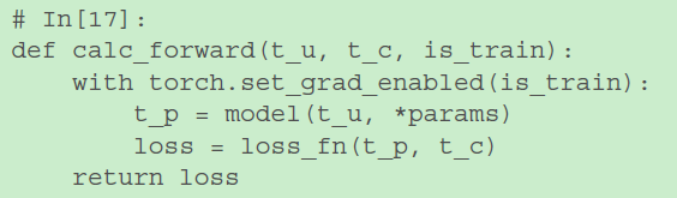

### *总结*

   ·线性模型是用于拟合数据的最简单的合理模型。

   ·凸优化技术可以用于线性模型，但它们不能推广到神经网络，因此本章重点介绍参数估计。

   ·深度学习可用于并非为解决特定任务而设计的通用模型，但可以自动调整以专门解决当前的问题。

   ·学习算法等于根据观察结果优化模型参数。损失函数是对执行任务中的错误的一种度量，例如预测输出和测量值之间的错误。优化目标是使损失函数尽可能低。

   ·loss损失函数相对于模型参数的变化率可用于在减少损失的方向上更新相应的参数。

   ·PyTorch中的optim模块提供了一组现成的优化器，用于更新参数和最小化损失函数。

   ·优化器使用PyTorch的autograd功能来计算每个参数的梯度，具体取决于该参数对最终输出的贡献程度。此功能允许用户在复杂的前向传播过程中依赖动态计算图。

   ·上下文管理器（例如torch.no_grad（））：可用于控制autograd行为。

   ·数据通常分为训练样本和验证样本的独立集合，从而模型可以对未经训练的数据进行评估。

   ·当模型的性能在训练集上持续提高但在验证集上下降时，就发生了模型过拟合。这种情况通常发生在模型无法泛化时，而是只是记忆训练集所需的输出。

# 5. 使用神经网络拟合数据

In [105]:
# 不管基础模型是什么，向参数反向传播误差，然后通过采用相对于损耗的梯度来更新这些参数，这些部分都是相同

 #  5.1人工神经元
 
 从本质上讲，神经元不过是输入的线性变换（例如，输入乘以数字[权重]，再加上常数[偏置]），然后应用固定的非线性函数（称为激活函数）。
 
在数学上，您可以将其写为o = f（w * x + b）

##  5.1.1您需要的只需激活函数

激活函数的作用是将先前线性操作的输出集中到给定范围内 or 限制输出值

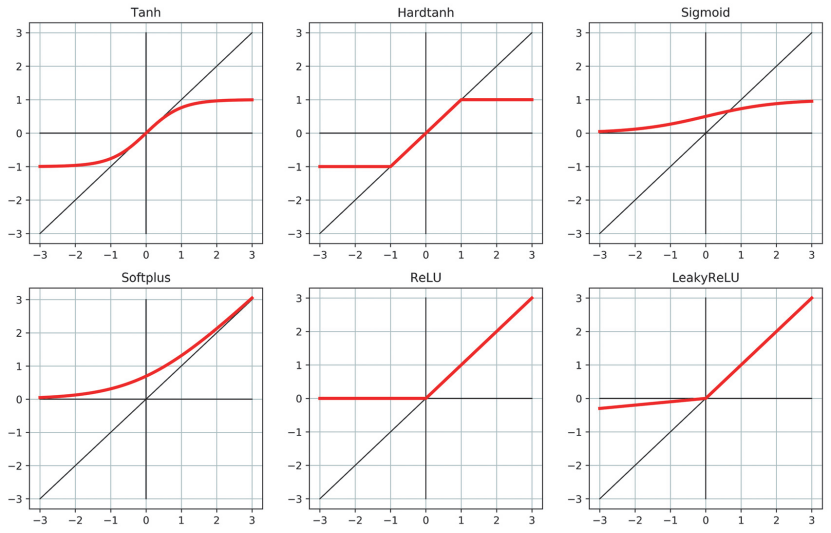

这些函数的曲线随着x趋于负无穷大而渐近地接近零或负1，随着x的增加而靠近1，并且在x == 0时具有大致恒定的斜率。从概念上讲，这种形状的函数可以很好地工作，因为这意味着您的神经元（即线性函数，然后是激活函数）将对线性函数输出中间的区域敏感；其他所有东西都集中在边界值旁边。

 根据定义（https://openai.com/blog/nonlinear-computation-in-linear-networks/），激活函数是：
 
·是非线性的-重复使用w*x+b而没有多项式的激活函数。非线性可以让整个网络近似更复杂的函数。

·具有可微性-它们具有可微性，因此可以通过它们计算梯度。正如您在Hardtanh或ReLU	中看到的那样，点不连续性很好。

没有这些函数，网络要么会退回到复杂的多项式，要么变得难以训练。

函数通常也具有如下特点（尽管并非全部如此）：

·至少要有一个敏感范围，其中输入的微小变化会导致输出相应的微小变化。

·至少具有一个不敏感（或饱和）范围，其中输入的变化导致的输出变化很小甚至没有变化。

激活功能通常（但并非普遍如此）具有以下至少一项：

·当输入变为负无穷大时接近（或达到）其下限

·对于正无穷大的输入产生相似但相反的上限

考虑一下您对反向传播的工作原理的了解，可以发现，当输入处于响应范围内时，误差将通过激活函数更有效地向后传播，而误差不会严重影响输入饱和的神经元（因为由于输出在平坦区域，梯度将接近零）。

 ## 5.1.2学习对于神经网络意味着什么
 
 使用深度神经网络之所以如此吸引人，是因为它使您不必担心表示数据的确切函数（无论是二次多项式、分段多项式还是其他函数）。使用深度神经网络模型，您将获得通用逼近器和估算其参数的方法。通过构建简单的搭建模块，可以根据模型容量及其对复杂的输入/输出关系进行建模的能力来定制该近似器。
 
 
深度神经网络是一系列函数，可以近似各种输入/输出关系，而不必要求提供一种现象的解释模型。在某种程度上，您要放弃解释，以换取解决日益复杂的问题的可能性。换句话说，有时您缺乏能力、信息或计算资源来为您所呈现的内容建立显式模型，因此数据驱动方法是您解决问题的唯一方法。

#   5.2 PyTorch的nn模块

In [108]:
# PyTorch有一个专门用于神经网络的完整子模块：torch.nn

  
# PyTorch的模块是从nn.Module基类派生的Python类。一个模块可以具有一个或多个参数实例作为属性，这些实例是张量，其值在训练过程中进行了优化。（在线性模型中考虑w和b。）一个模块还可以具有一个或多个子模块（nn.Module的子类）作为属性，并且它也可以跟踪其参数。

#  注意 子模块必须是顶级属性，而不能装在list或dict实例中！否则，优化器将无法找到子模块（及其参数）。 对于您的模型需要子模块列表或字典的情况，PyTorch提供nn.ModuleList和nn.ModuleDict。

In [214]:
#  所有PyTorch提供的nn.Module子类都定义了其call方法，使您可以实例化nn.Linear并将其像一个函数一样调用，如下面的清单所示。
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn

torch.set_printoptions(edgeitems=2, linewidth=75)


t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

linear_model = nn.Linear(1,1)
linear_model(t_un_val)

tensor([[[9142.0732],
         [ 129.9407]],

        [[   9.2307],
         [  13.3801]]], grad_fn=<AddBackward0>)

使用一组参数调用nn.Module的实例最终将调用具有相同参数的名为forward的方法。 forward方法执行前向计算； call方法在进行调用forward之前和之后还会执行其他相当重要的杂务。因此，从技术上讲，可以直接调用forward函数，并且产生与call相同的输出，但是不应从用户代码中完成：

In [127]:
#  nn.Linear的构造函数接受三个参数：输入特征的数量，输出特征的数量以及线性模型是否包含偏置（此处默认为True）。

In [129]:
# 您有一个具有一个输入和一个输出特征的nn.Linear实例，它需要一个权重和一个偏置：
linear_model.weight,linear_model.bias

(Parameter containing:
 tensor([[0.2329]], requires_grad=True),
 Parameter containing:
 tensor([-0.3057], requires_grad=True))

In [130]:
# PyTorch nn.Module及其子类被设计为可以同时对多个样本进行处理。为了容纳多个样本，模块希望输入的第零维为批次中的样本数。?

In [186]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [187]:
# 首先，将您的手工模型替换为nn.Linear（1,1）; 然后将线性模型参数传递给优化器：
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(),lr=1e-2)

In [188]:
# 使用parameters方法，向任何nn.Module模块其或其任何子模块访问其拥有的参数列表：
linear_model.parameters()

list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.9217]], requires_grad=True),
 Parameter containing:
 tensor([-0.6728], requires_grad=True)]

In [189]:
# 训练循环几乎没有改变，除了现在您不需要显式地将参数params传递给模型model，因为模型内部本身保存了其参数。
def training_loop(n_epochs, optimizer, model,loss_fn, t_u_train,t_u_val,t_c_train, t_c_val):
    for epoch in range(1,n_epochs +1):
            
        t_p_train = model(t_un_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn( t_p_val, t_c_val)
        
        optimizer.zero_grad() # 梯度清零
        loss_train.backward() # 这样梯度就算出来了
        optimizer.step() ##根据梯度，更新参数
        
        if epoch == 1 or epoch % 1000 == 0:
            print('Epoch  {},Training Loss {}, Validation Loss {}'.format(epoch, float(loss_train), float(loss_val)))
            
    return params 

In [190]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(),lr=1e-2)

training_loop(n_epochs = 3000, optimizer = optimizer,model = linear_model,loss_fn = nn.MSELoss(), t_u_train = t_un_train, t_u_val = t_un_val,t_c_train = t_c_train, t_c_val = t_c_val)


Epoch  1,Training Loss 92.39163208007812, Validation Loss 39.96089553833008
Epoch  1000,Training Loss 2.9902517795562744, Validation Loss 6.101339817047119
Epoch  2000,Training Loss 2.4376187324523926, Validation Loss 6.50853157043457
Epoch  3000,Training Loss 2.4287753105163574, Validation Loss 6.561678886413574


tensor([  5.4078, -17.5912], requires_grad=True)

您将构建最简单的可能的神经网络：一个线性模块，然后将一个激活函数输入另一个线性模块。由于历史原因，第一个线性+激活层通常称为隐藏层，因为它的输出不会直接观察到，而是会馈送到输出层。 尽管模型的输入和输出大小均为1（它们具有一个输入和一个输出特征），但是第一个线性模块的输出大小通常大于1。

In [191]:
#  nn提供了一种通过nn.Sequential容器连接模块的简单方法：

seq_model = nn.Sequential(
    nn.Linear(1,13),
    nn.Tanh(),
    nn.Linear(13,1))

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [159]:
# 调用model.parameters（）可以从第一线性模块和第二线性模块中收集权重和偏置。在这种情况下，通过打印形状可以检查参数：
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [160]:
#  这些是优化器将获得的张量
# 在调用model.backward（）之后，所有参数都将保存在grad属性中，然后优化器会在调用optimizer.step（）时相应地更新其值，这与之前的线性模型没有太大不同。

In [164]:
# 当您检查由几个子模块组成的模型的参数时，可以方便地通过它们的名称来识别参数。有一种方法叫做named_parameters：

for name ,param in seq_model.named_parameters():
    print(name, param.shape)
# Sequential中每个模块的名称都是该模块在参数中出现的顺序

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [192]:
# Sequential还接受一个有序字典OrderedDict，您可以在其中为传递给Sequential的每个模块命名：

from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1,8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear',nn.Linear(8,1))
    ]))

for name ,param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [194]:
# 也可以通过访问子模块来访问特定的参数，就像它们是属性一样：
seq_model.output_linear.bias

Parameter containing:
tensor([-0.0361], requires_grad=True)

In [195]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch  1,Training Loss 201.26443481445312, Validation Loss 150.25009155273438
Epoch  1000,Training Loss 3.191136121749878, Validation Loss 9.411015510559082
Epoch  2000,Training Loss 1.4356621503829956, Validation Loss 8.489511489868164
Epoch  3000,Training Loss 1.2985261678695679, Validation Loss 7.7467546463012695
Epoch  4000,Training Loss 1.2650671005249023, Validation Loss 7.59100341796875
Epoch  5000,Training Loss 1.2409393787384033, Validation Loss 7.5947723388671875
output tensor([[16.2415],
        [13.1639]], grad_fn=<AddmmBackward>)
answer tensor([[13.],
        [11.]])
hidden tensor([[ 0.0073],
        [-0.0217],
        [-0.0067],
        [ 0.0295],
        [ 0.0010],
        [ 0.0164],
        [-0.0120],
        [ 0.0058]])


 上述代码对于检查参数或其梯度非常有用，例如在训练期间监视梯度。

 假设您要打印出隐藏层线性部分的权重的梯度。您可以为新的神经网络模型运行训练循环，然后在最后一个epoch之后查看梯度结果：

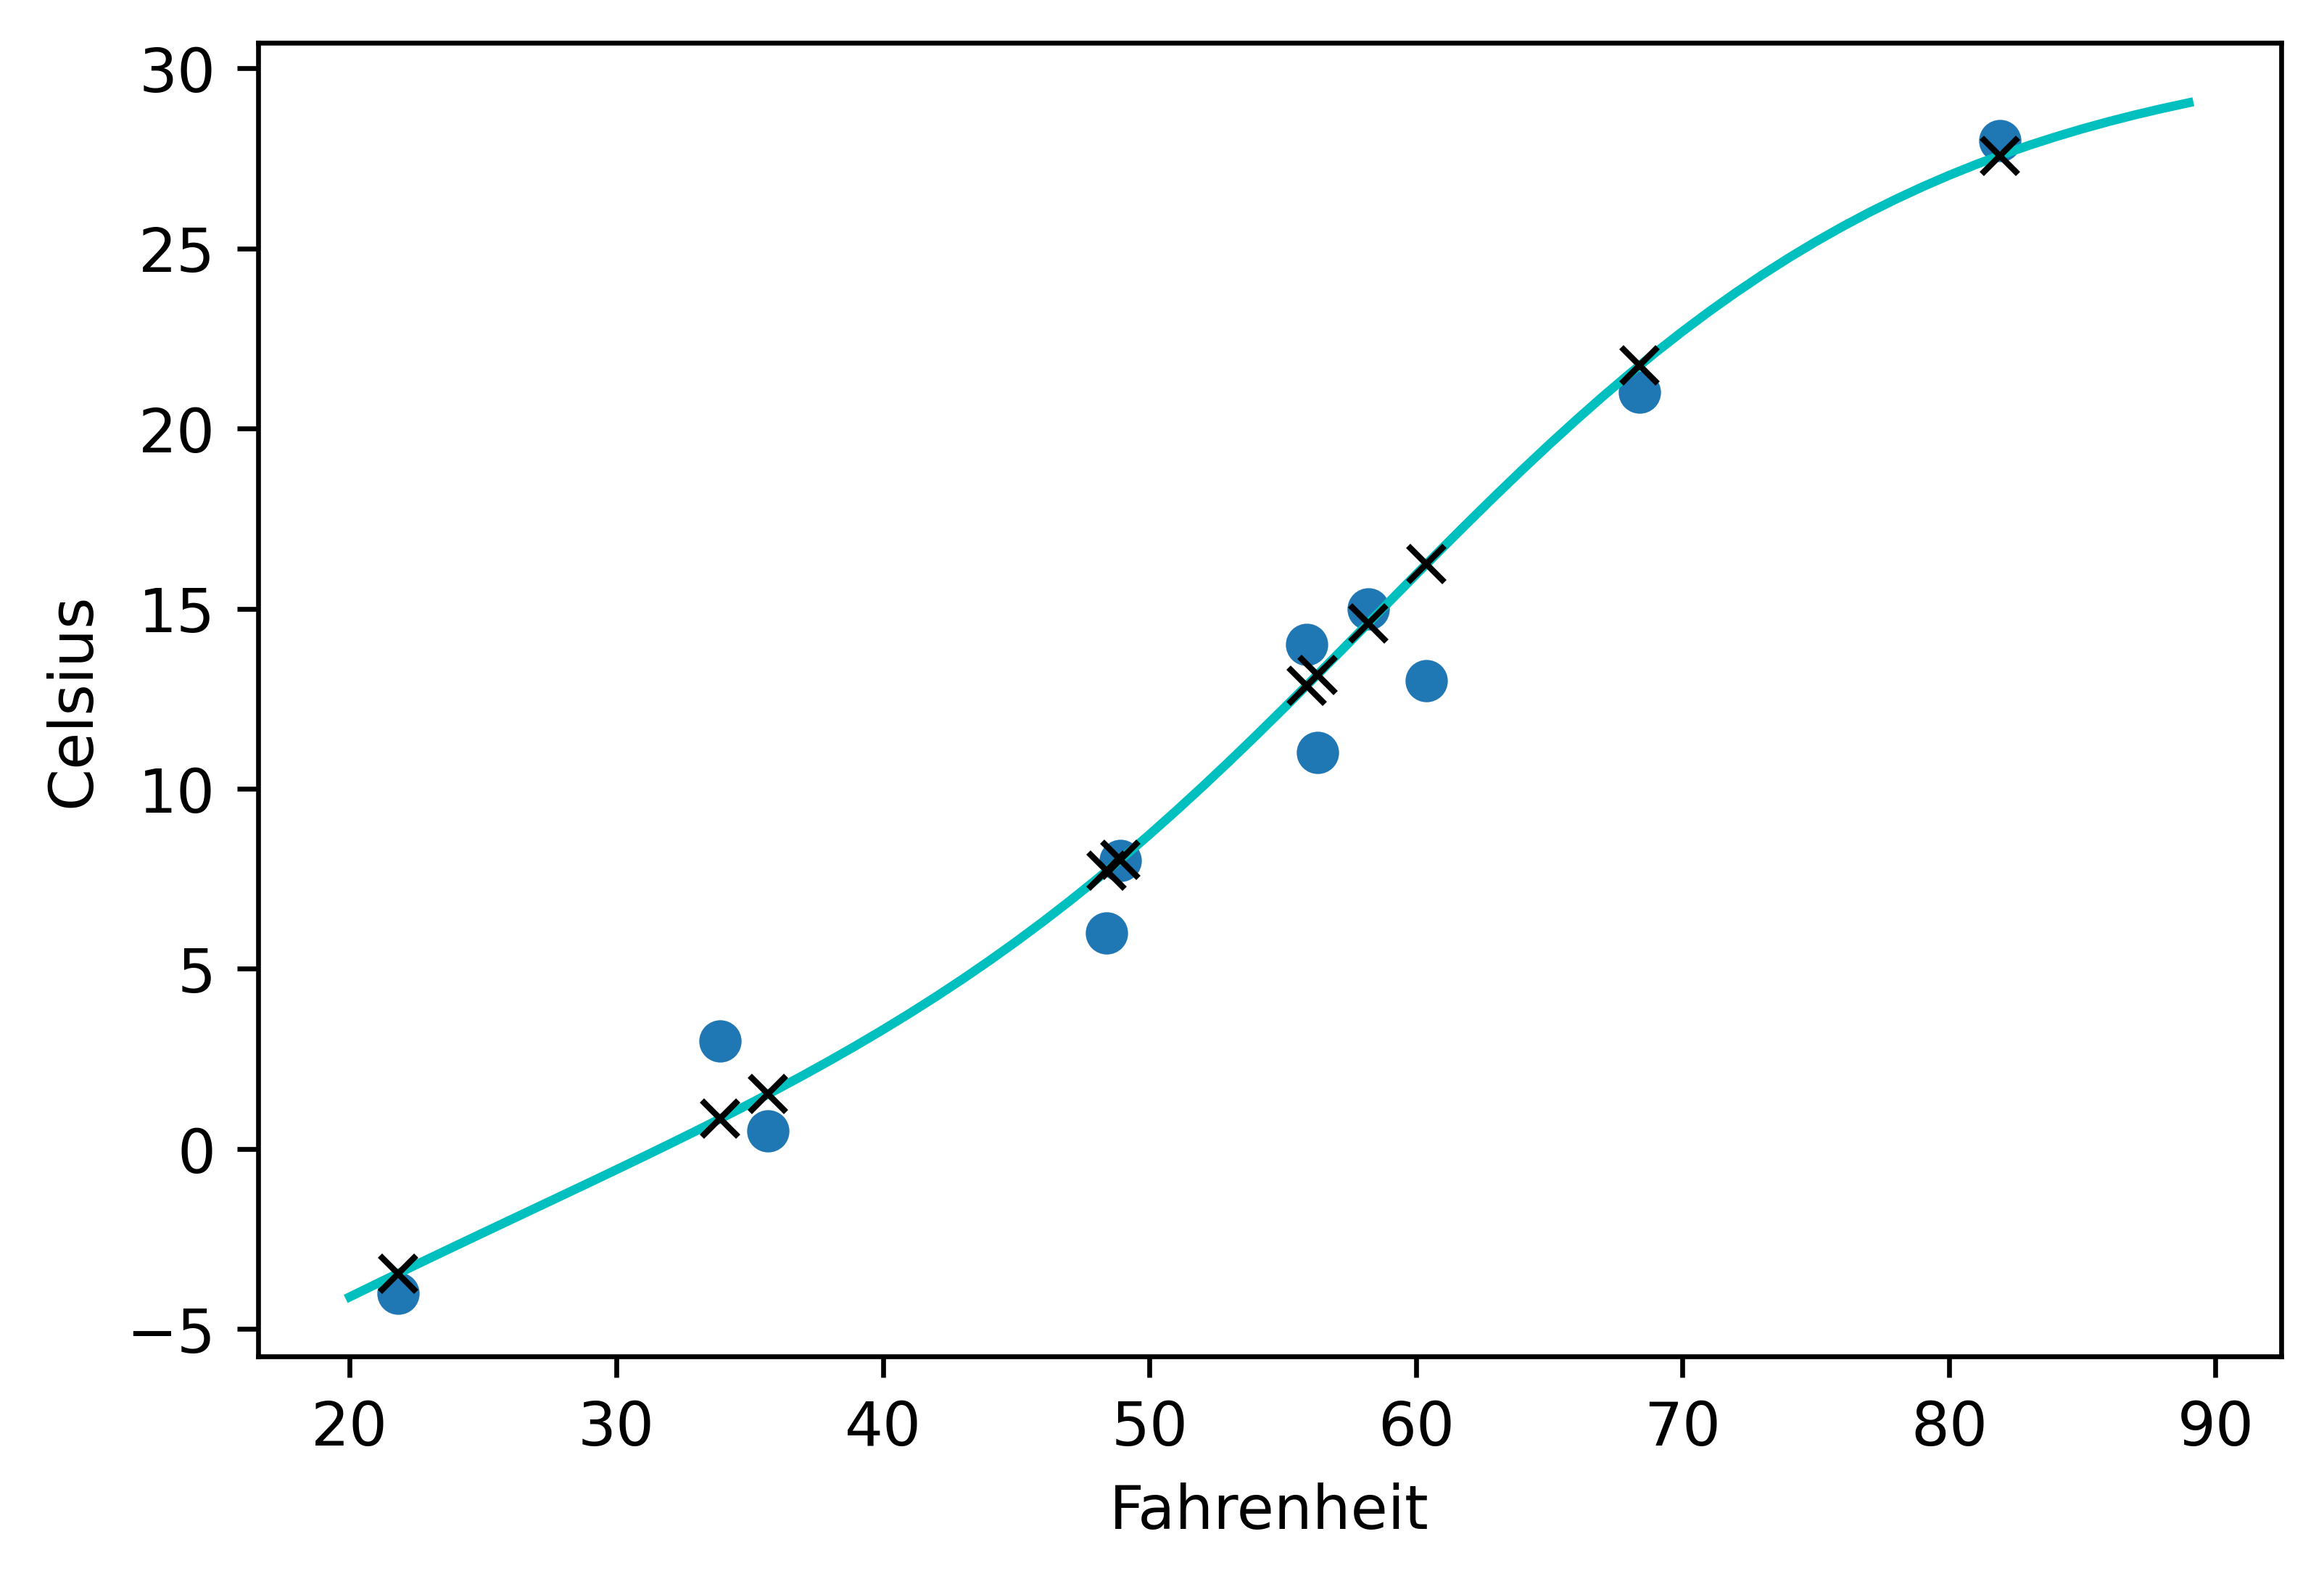

In [196]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)
 
fig = plt.figure(dpi = 600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

In [197]:
# 图5.8神经网络模型的图，其中包含输入数据（用圆圈表示），期望输出（用叉表示）和显示样品之间行为的实线

# 5.3继承nn.Module类

对于更大、更复杂的项目，您需要将nn.Sequential舍弃，而应使用赋予您更大灵活性的方法：将nn.Module子类化。要为nn.Module子类化，至少需要定义.forward（…）函数，该函数将输入数据输入到模块并返回输出结果。如果您使用标准torch操作，则autograd会自动处理反向传递。
注意  通常，您的整个模型都是作为nn.Module的子类实现的，而子类又可以包含也是nn.Module的子类的子模块。

In [198]:
# 第一种方法： nn.Sequential的简单实例

from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1,8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear',nn.Linear(8,1))
    ]))

for name ,param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [202]:
# 子类化nn.Module来完全控制输入数据的处理

# 这段代码最终变得更加冗长，因为您必须定义要拥有的层，
#然后定义在forward函数中应如何以及以什么顺序处理它们。
# 但是这样的重复工作为您在sequential模型中提供了难以置信的灵活性
#，因为您现在可以自由地在Forward函数中执行各种有趣的事情。
class SubclassModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden_linear = nn.Linear(1,12)
        self.hidden_activation = nn.Tanh()
        self.output_linear = nn.Linear(12,1)
        
    def forward(self, input):
        hidden_t =self.hidden_linear(input)
        activated_t = self.hidden_activation(hidden_t)#可以写为nn.Tanh(hidden_t)
        output_t = self.output_linear(activated_t)
        
        return output_t
    
subclass_model = SubclassModel()
subclass_model

SubclassModel(
  (hidden_linear): Linear(in_features=1, out_features=12, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=12, out_features=1, bias=True)
)

In [203]:
#  通常，您希望使用模块的构造函数来定义我们在forward函数中调用的子模块，以便它们可以在模块的整个生命周期中保存其参数。

总结

·神经网络可以自动调整以专门解决眼前的问题。
·神经网络可以轻松访问模型中损失相对于任何参数的导数，从而使参数的演化变得高效。 得益于其自动微分引擎，PyTorch可以轻松提供此类导数。
·围绕线性变换的激活函数使神经网络能够逼近高度非线性的函数，同时使它们变得足够简单以进行优化。
·nn模块与张量标准库一起提供了用于创建神经网络的所有构建块。
·要识别出过拟合，必须将训练数据点集与验证集分开。没有解决过拟合的方法，除了获取更多数据（或增加数据中的可变性），并且采用更简单的模型是一个好的开始。
·任何从事数据科学的人都应该时刻绘制数据。